# **Tabular Playground Series - Sep 2022**
### Predicting a full year worth of sales

<img width="300" src="https://historia.nationalgeographic.com.es/medio/2017/06/26/nostradamus_1439x2000_11877630.JPG">

Here we go...

In [1]:
import pandas as pd

train_dataset = pd.read_csv('../input/tabular-playground-series-sep-2022/train.csv')
# Hands on time stamps:
train_dataset['date'] = pd.to_datetime(train_dataset['date'])
train_dataset

row_id       date  country       store  \
0           0 2017-01-01  Belgium  KaggleMart   
1           1 2017-01-01  Belgium  KaggleMart   
2           2 2017-01-01  Belgium  KaggleMart   
3           3 2017-01-01  Belgium  KaggleMart   
4           4 2017-01-01  Belgium  KaggleRama   
...       ...        ...      ...         ...   
70123   70123 2020-12-31    Spain  KaggleMart   
70124   70124 2020-12-31    Spain  KaggleRama   
70125   70125 2020-12-31    Spain  KaggleRama   
70126   70126 2020-12-31    Spain  KaggleRama   
70127   70127 2020-12-31    Spain  KaggleRama   

                                product  num_sold  
0            Kaggle Advanced Techniques       663  
1                Kaggle Getting Started       615  
2                    Kaggle Recipe Book       480  
3      Kaggle for Kids: One Smart Goose       710  
4            Kaggle Advanced Techniques       240  
...                                 ...       ...  
70123  Kaggle for Kids: One Smart Goose       614  
70124        Kaggle Advanced Techniques       215  
70125            Kaggle Getting Started       158  
70126                Kaggle Recipe Book       135  
70127  Kaggle for Kids: One Smart Goose       202  

[70128 rows x 6 columns]

## Sales by product:

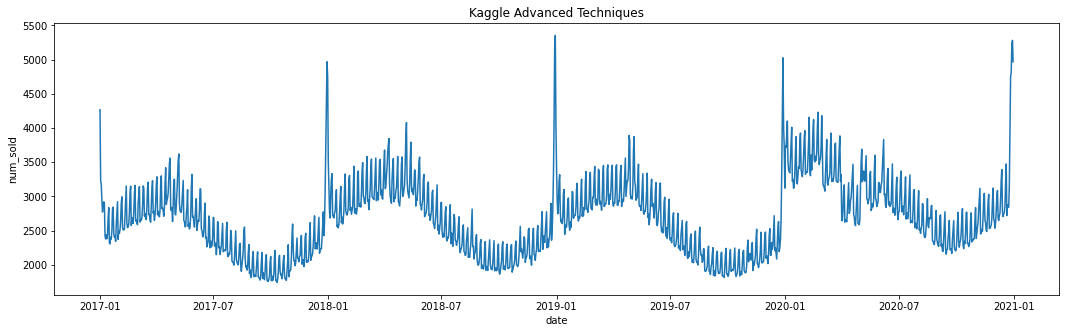

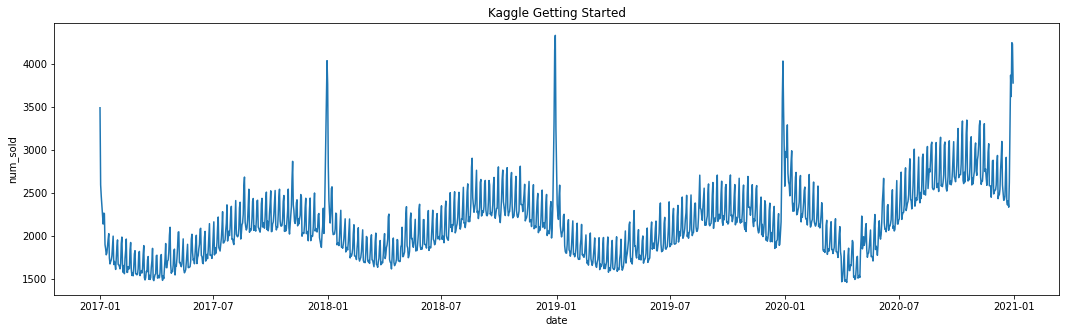

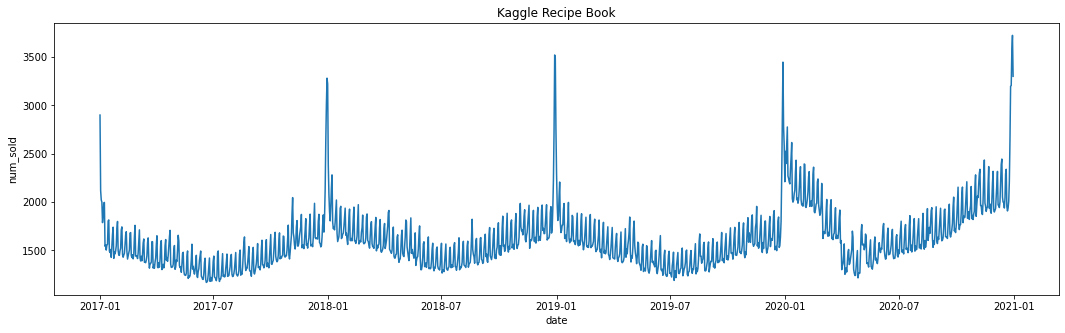

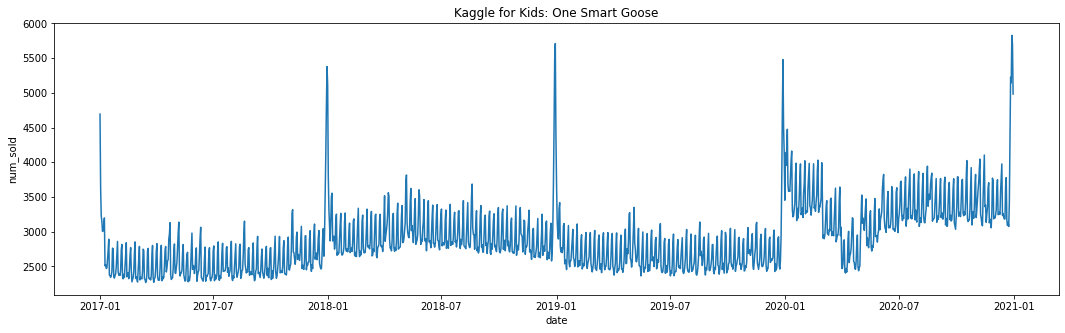

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

for product in train_dataset['product'].unique():
    plt.subplots(figsize=(18,5))
    sns.lineplot(data=train_dataset[train_dataset['product'] == product].groupby('date').sum()[['num_sold']].reset_index(), x = 'date', y = 'num_sold').set_title(product)
    plt.show()

In [3]:
# grouped time series by book:
kat_or = train_dataset[train_dataset['product'] == 'Kaggle Advanced Techniques'].groupby('date').sum()[['num_sold']].reset_index()
kgs_or = train_dataset[train_dataset['product'] == 'Kaggle Getting Started'].groupby('date').sum()[['num_sold']].reset_index()
krb_or = train_dataset[train_dataset['product'] == 'Kaggle Recipe Book'].groupby('date').sum()[['num_sold']].reset_index()
kfk_or = train_dataset[train_dataset['product'] == 'Kaggle for Kids: One Smart Goose'].groupby('date').sum()[['num_sold']].reset_index()

In [4]:
# removing 2020:
kat = kat_or[kat_or['date'].dt.year < 2020]
kgs = kgs_or[kgs_or['date'].dt.year < 2020]
krb = krb_or[krb_or['date'].dt.year < 2020]
kfk = kfk_or[kfk_or['date'].dt.year < 2020]

In [5]:
!pip install git+https://github.com/ourownstory/neural_prophet.git
from neuralprophet import NeuralProphet

  Cloning https://github.com/ourownstory/neural_prophet.git to /tmp/pip-req-build-7_g6jpce
  Running command git clone --filter=blob:none --quiet https://github.com/ourownstory/neural_prophet.git /tmp/pip-req-build-7_g6jpce
  Resolved https://github.com/ourownstory/neural_prophet.git to commit 0d1312c1d954ca3dcdc3d9121667002c4e2b5bd3
  Running command git submodule update --init --recursive -q
  Installing build dependencies ... - \ | / done
  Getting requirements to build wheel ... - done
  Preparing metadata (pyproject.toml) ... - done
  Created wheel for neuralprophet: filename=neuralprophet-0.3.3-py3-none-any.whl size=92189 sha256=c03709eb96ba46d4420dcfd9963e82fad5947895f04aae1cde46f179fa3bf81b
  Stored in directory: /tmp/pip-ephem-wheel-cache-uyobujl2/wheels/bc/d0/dd/f2b1133865669ed9b544f6f1ff9155aedf57c9dbfc72ce211e
Successfully built neuralprophet


## kat

In [6]:
kat.columns = ['ds','y']
model = NeuralProphet(
    n_lags=16,
    n_forecasts=731,
    changepoints_range=0.95,
    n_changepoints=10,
    weekly_seasonality=False,
    batch_size=32,
    epochs=100,
    learning_rate=0.005,
    daily_seasonality="auto",
    seasonality_mode="additive"
)
metrics = model.fit(kat, freq='D')

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.909% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
Epoch[100/100]: 100%|██████████| 100/100 [00:08<00:00, 11.29it/s, SmoothL1Loss=0.0248, MAE=277, RMSE=377, Loss=0.0178, RegLoss=0]


In [7]:
metrics

SmoothL1Loss          MAE         RMSE      Loss  RegLoss
0       1.528837  3361.947450  3916.395238  1.162012      0.0
1       1.523673  3352.862238  3907.173878  1.158147      0.0
2       1.515373  3338.257989  3892.461671  1.151930      0.0
3       1.501918  3314.566613  3868.429458  1.141888      0.0
4       1.481120  3277.909773  3831.190422  1.126351      0.0
..           ...          ...          ...       ...      ...
95      0.024820   276.962810   376.796183  0.017779      0.0
96      0.024815   276.933046   376.778605  0.017776      0.0
97      0.024812   276.918117   376.650767  0.017774      0.0
98      0.024811   276.910995   376.718957  0.017773      0.0
99      0.024811   276.908873   376.724396  0.017773      0.0

[100 rows x 5 columns]

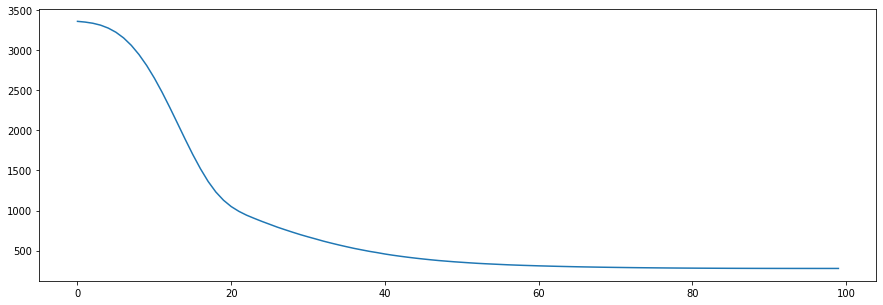

In [8]:
metrics['MAE'].plot(figsize=(15,5));

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.909% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.945% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.945% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.7/site-packages/neuralprophet/forecaster.py:2895: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `

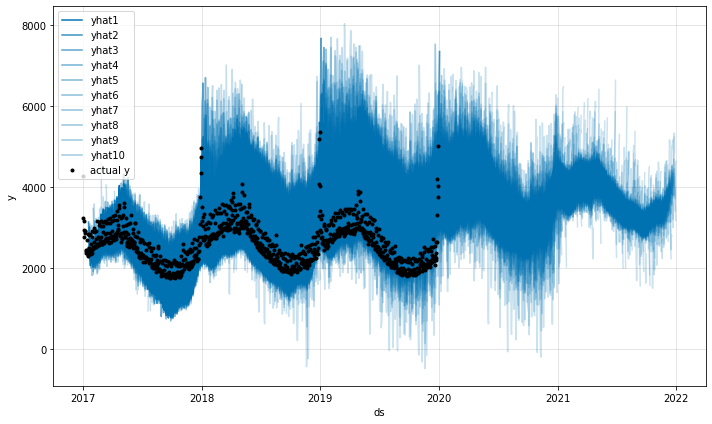

In [9]:
future = model.make_future_dataframe(kat, n_historic_predictions=True)
forecast = model.predict(future)
fig = model.plot(forecast)

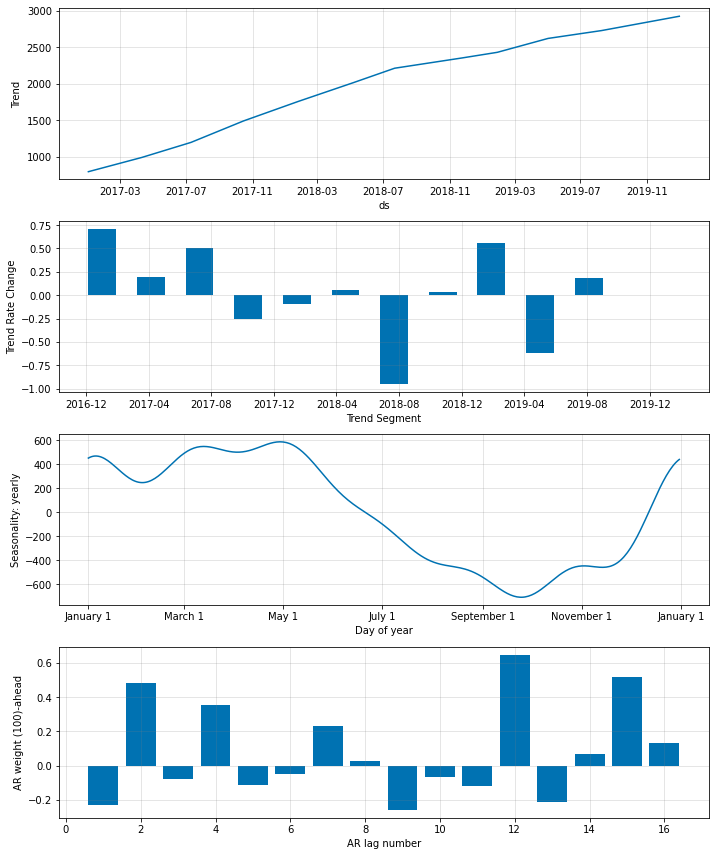

In [10]:
# fig_comp = m.plot_components(forecast)
m = model.highlight_nth_step_ahead_of_each_forecast(100) # temporary workaround to plot actual AR weights
fig_param = m.plot_parameters()

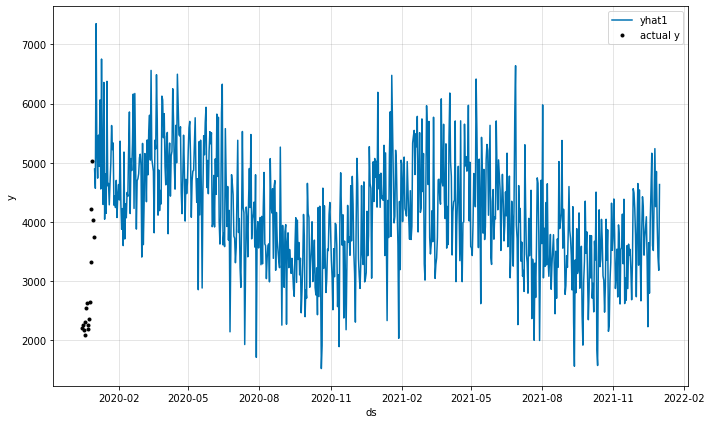

In [11]:
m = model.highlight_nth_step_ahead_of_each_forecast(None) # reset highlight
fig = m.plot_last_forecast(forecast)

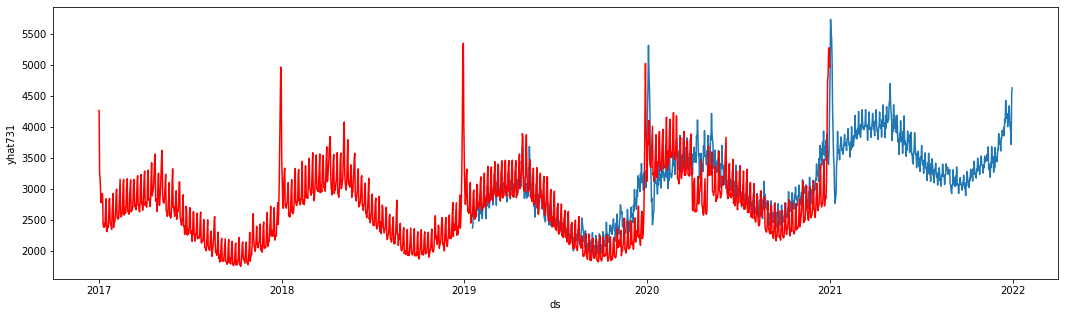

In [12]:
plt.subplots(figsize=(18,5))
sns.lineplot(data=forecast, x='ds', y ='yhat731');
sns.lineplot(data=kat_or, x='date', y='num_sold', color='r').invert_yaxis();

## kgs

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.909% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
Epoch[100/100]: 100%|██████████| 100/100 [00:09<00:00, 10.07it/s, SmoothL1Loss=0.00847, MAE=88.1, RMSE=145, Loss=0.00641, RegLoss=0]


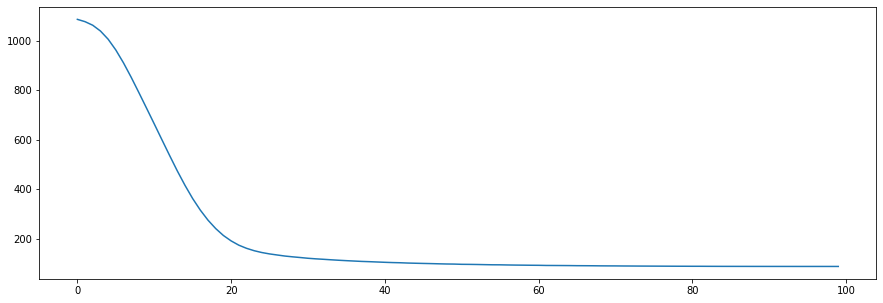

In [13]:
kgs.columns = ['ds','y']
model2 = NeuralProphet(
    n_lags=32,
    n_forecasts=731,
    changepoints_range=0.95,
    n_changepoints=3,
    weekly_seasonality=False,
    yearly_seasonality=12,
    batch_size=16,
    epochs=100,
    learning_rate=0.005,
    daily_seasonality="auto",
    seasonality_mode="additive"
)
metrics2 = model2.fit(kgs, freq='D')

metrics2['MAE'].plot(figsize=(15,5));

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.909% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.945% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.945% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.7/site-packages/neuralprophet/forecaster.py:2895: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `

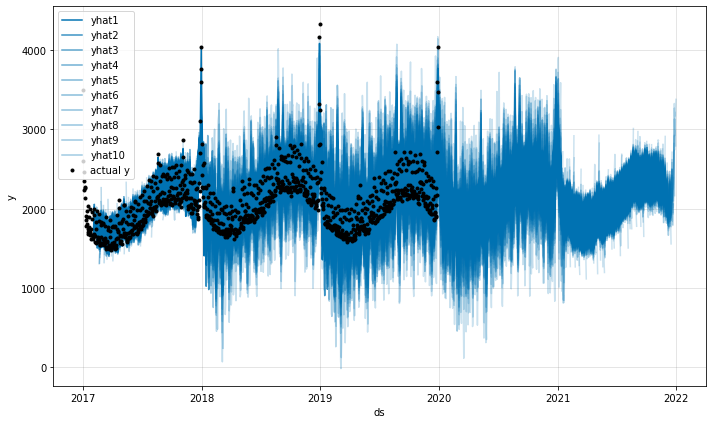

In [14]:
future2 = model2.make_future_dataframe(kgs, n_historic_predictions=True)
forecast2 = model2.predict(future2)
fig2 = model2.plot(forecast2)

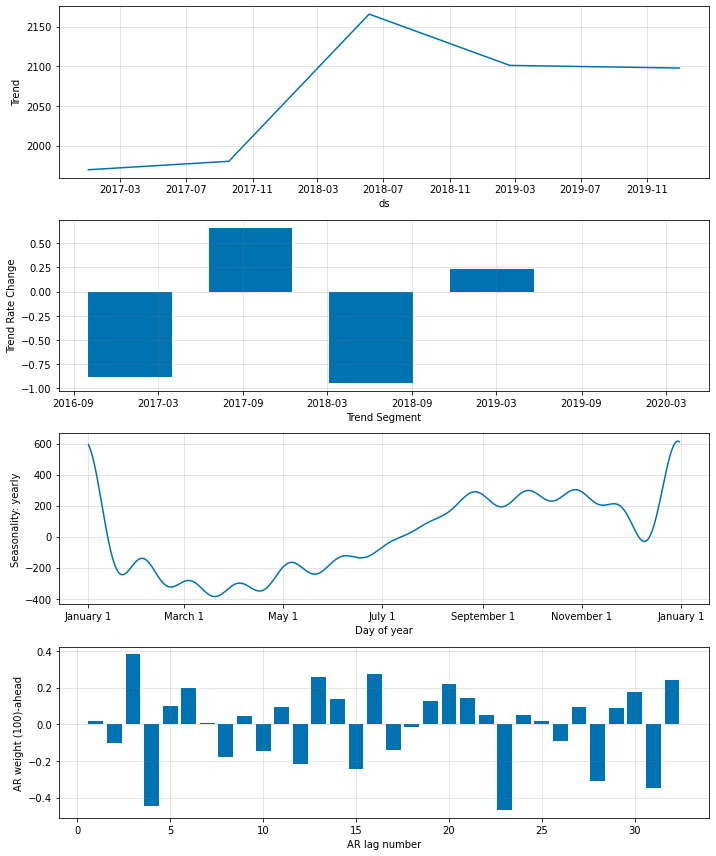

In [15]:
# fig_comp = m.plot_components(forecast)
m2 = model2.highlight_nth_step_ahead_of_each_forecast(100) # temporary workaround to plot actual AR weights
fig_param2 = m2.plot_parameters()

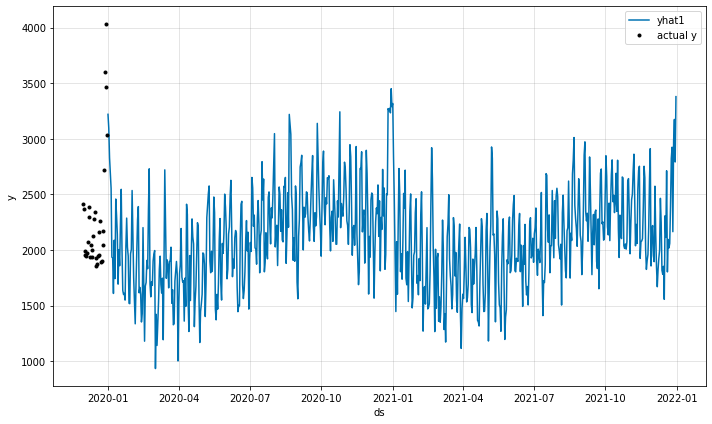

In [16]:
m2 = model2.highlight_nth_step_ahead_of_each_forecast(None) # reset highlight
fig2 = m2.plot_last_forecast(forecast2)

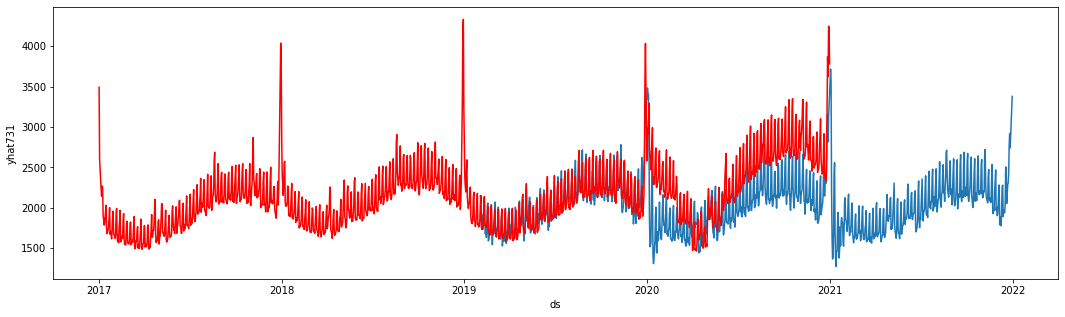

In [17]:
plt.subplots(figsize=(18,5))
sns.lineplot(data=forecast2, x='ds', y ='yhat731')
sns.lineplot(data=kgs_or, x='date', y='num_sold', color='r').invert_yaxis();

## krb

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.909% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
Epoch[100/100]: 100%|██████████| 100/100 [00:08<00:00, 11.61it/s, SmoothL1Loss=0.0291, MAE=119, RMSE=187, Loss=0.0214, RegLoss=0]


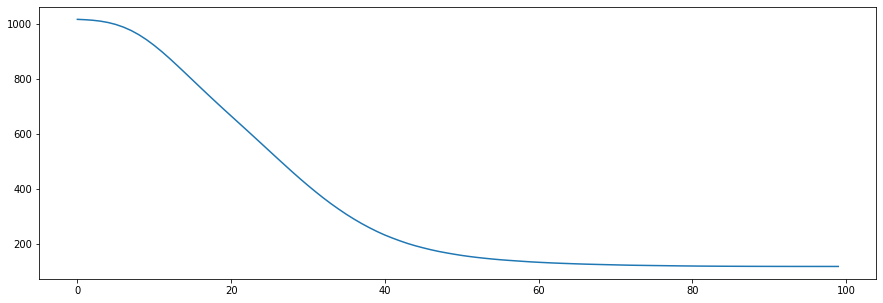

In [18]:
krb.columns = ['ds','y']
model3 = NeuralProphet(
    n_lags=16,
    n_forecasts=731,
    changepoints_range=0.95,
    n_changepoints=16,
    weekly_seasonality='auto',
    yearly_seasonality=3,
    batch_size=50,
    epochs=100,
    learning_rate=0.005,
    daily_seasonality="auto",
    seasonality_mode="additive"
)
metrics3 = model3.fit(krb, freq='D')

metrics3['MAE'].plot(figsize=(15,5));

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.909% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.945% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.945% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.7/site-packages/neuralprophet/forecaster.py:2895: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `

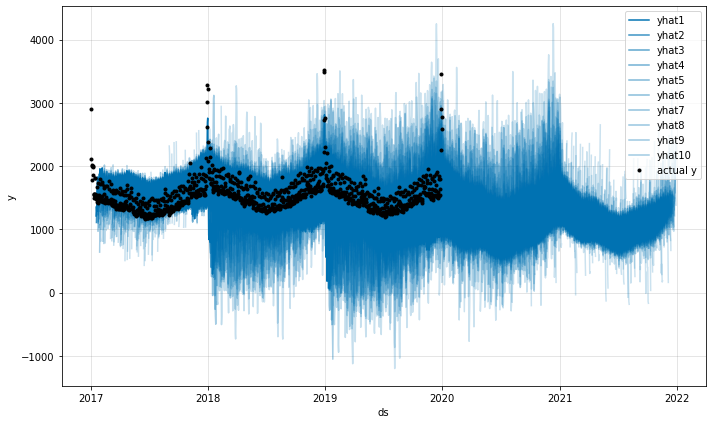

In [19]:
future3 = model3.make_future_dataframe(krb, n_historic_predictions=True)
forecast3 = model3.predict(future3)
fig3 = model3.plot(forecast3)

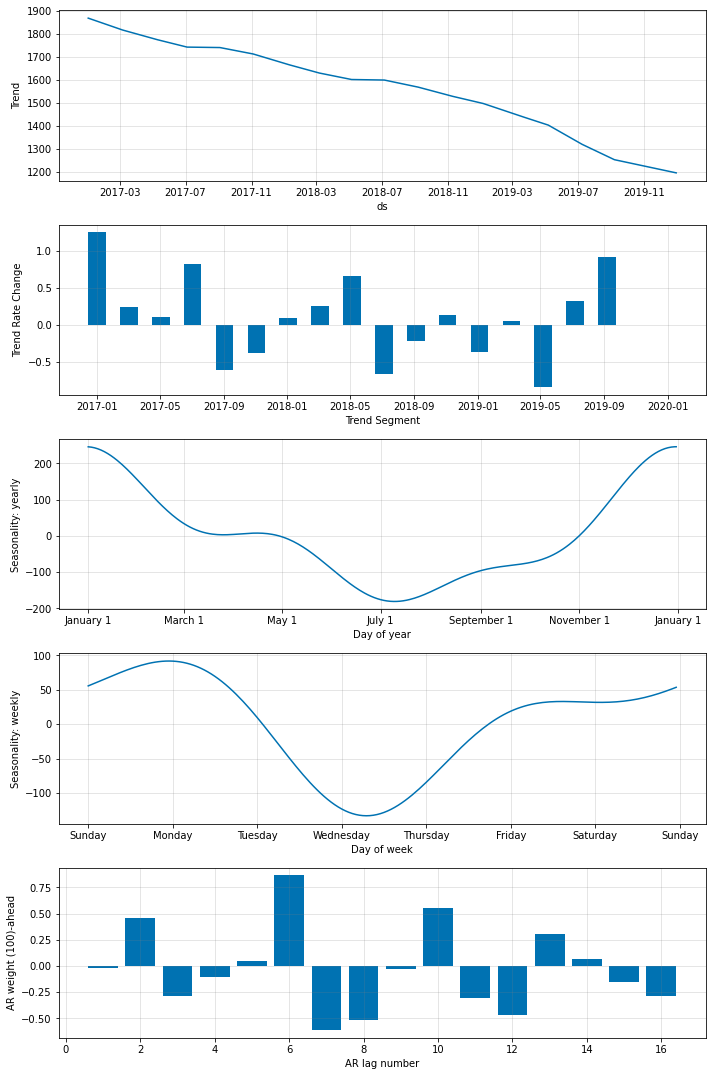

In [20]:
# fig_comp = m.plot_components(forecast)
m3 = model3.highlight_nth_step_ahead_of_each_forecast(100) # temporary workaround to plot actual AR weights
fig_param3 = m3.plot_parameters()

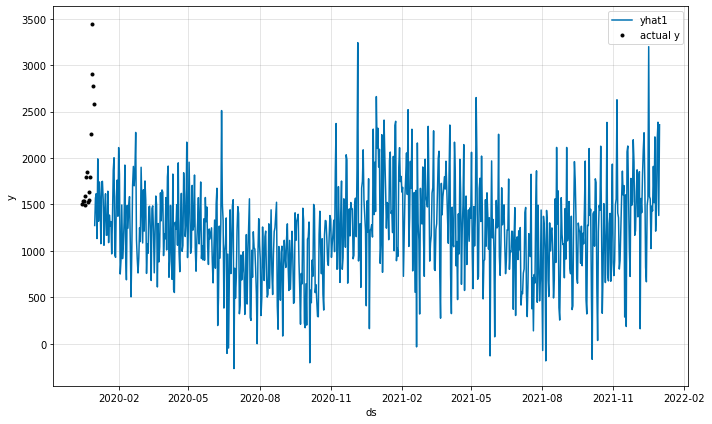

In [21]:
m3 = model3.highlight_nth_step_ahead_of_each_forecast(None) # reset highlight
fig3 = m3.plot_last_forecast(forecast3)

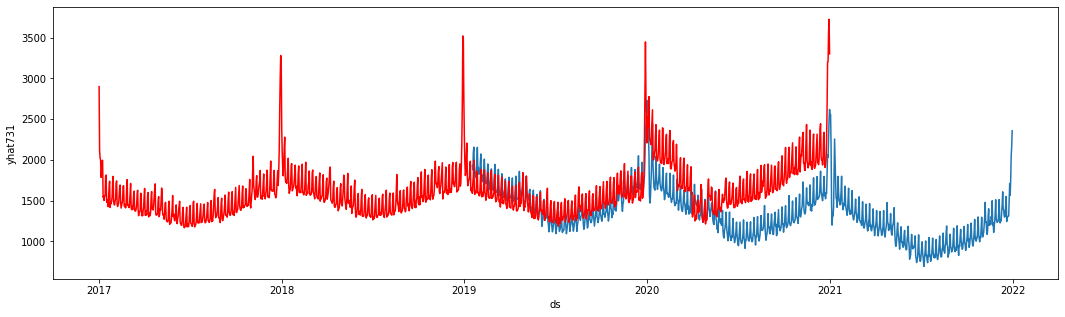

In [22]:
plt.subplots(figsize=(18,5))
sns.lineplot(data=forecast3, x='ds', y ='yhat731')
sns.lineplot(data=krb_or, x='date', y='num_sold', color='r').invert_yaxis();

## kfk

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.909% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
Epoch[100/100]: 100%|██████████| 100/100 [00:10<00:00,  9.72it/s, SmoothL1Loss=0.0429, MAE=215, RMSE=322, Loss=0.0321, RegLoss=0]


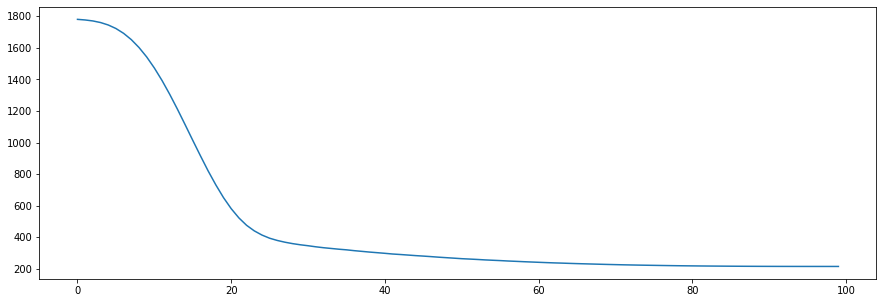

In [23]:
kfk.columns = ['ds','y']
model4 = NeuralProphet(
    n_lags=15,
    n_forecasts=731,
    changepoints_range=0.9,
    n_changepoints=17,
    weekly_seasonality=True,
    yearly_seasonality=4,
    batch_size=32,
    epochs=100,
    learning_rate=0.005,
    daily_seasonality="auto",
    seasonality_mode="additive"
)
metrics4 = model4.fit(kfk, freq='D')

metrics4['MAE'].plot(figsize=(15,5));

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.909% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.945% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.945% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.7/site-packages/neuralprophet/forecaster.py:2895: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `

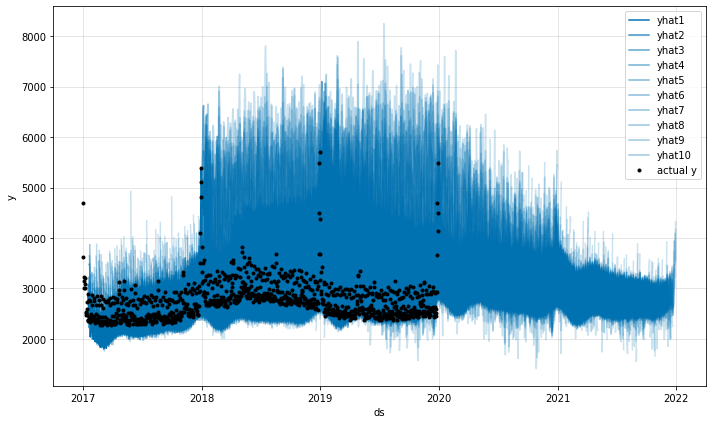

In [24]:
future4 = model4.make_future_dataframe(kfk, n_historic_predictions=True)
forecast4 = model4.predict(future4)
fig4 = model4.plot(forecast4)

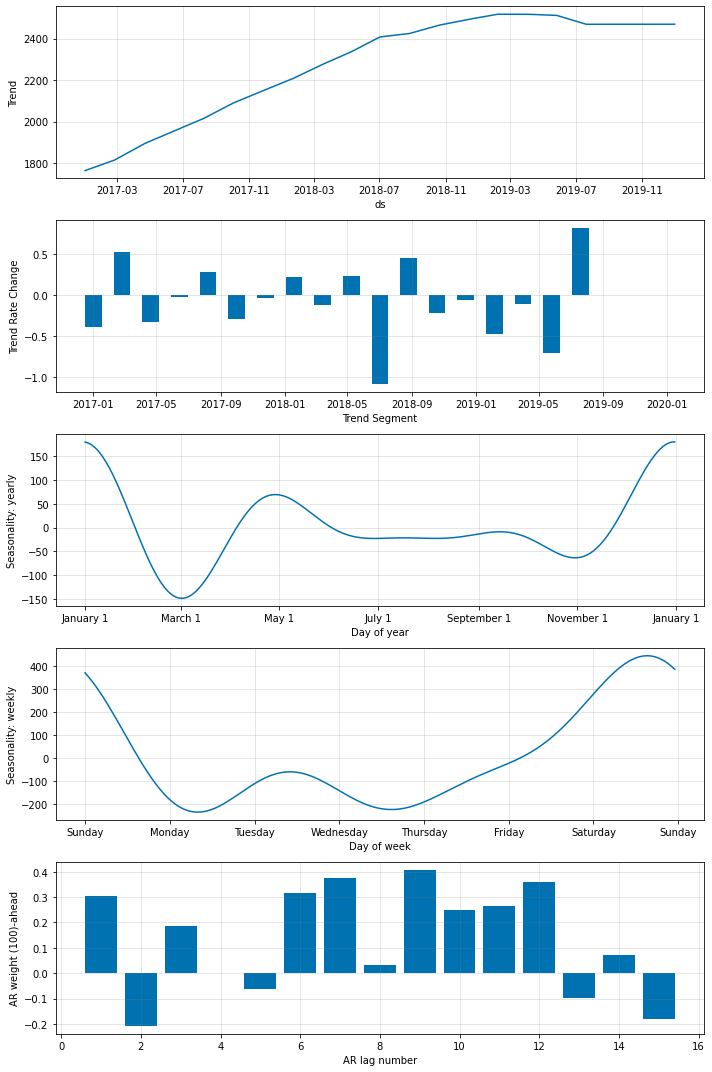

In [25]:
# fig_comp = m.plot_components(forecast)
m4 = model4.highlight_nth_step_ahead_of_each_forecast(100) # temporary workaround to plot actual AR weights
fig_param4 = m4.plot_parameters()

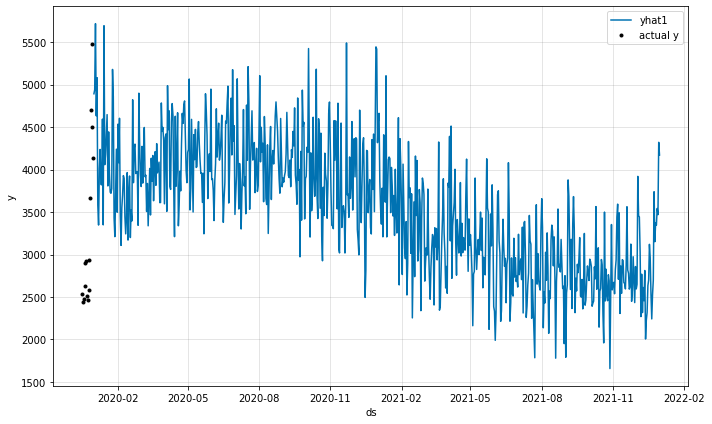

In [26]:
m4 = model4.highlight_nth_step_ahead_of_each_forecast(None) # reset highlight
fig4 = m4.plot_last_forecast(forecast4)

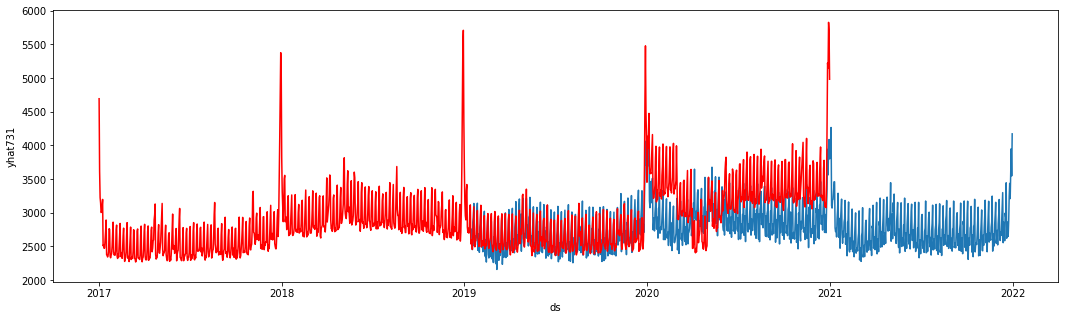

In [27]:
plt.subplots(figsize=(18,5))
sns.lineplot(data=forecast4, x='ds', y ='yhat731')
sns.lineplot(data=kfk_or, x='date', y='num_sold', color='r').invert_yaxis();

## Armar el dataframe para enviar:

### desagregar pronósticos por país y tienda:

In [28]:
import numpy as np
def desagregar_pronostico(book, forecast):
    temp_df = train_dataset[train_dataset['product'] == book].iloc[:,1:].pivot(index = 'date', columns = ['country', 'store', 'product'], values = 'num_sold')
    temp_df['sum'] = temp_df.sum(axis = 1)
    for column in temp_df.columns[:-1]:
        temp_df[column] = temp_df[column] / temp_df['sum']
        
    temp_df = temp_df.iloc[:,:-1]
    temp_df['month'] = temp_df.index.month
    temp_df['day'] = temp_df.index.day
    
    temp_df_mean = temp_df[temp_df.index.year < 2020].groupby(['month','day']).mean()
    temp_df_mean.reset_index(drop=True)
    
    index = pd.date_range(start='2021/1/1', periods=365, freq='D')
    func = lambda x: np.asarray(x) * np.asarray(forecast[['ds','yhat731']].iloc[1461:,:]['yhat731'])
    return temp_df_mean.apply(func).reset_index(drop=True).set_index(index)

### kat:

In [29]:
desagregar_pronostico('Kaggle Advanced Techniques', forecast)

country                       Belgium                             \
store                      KaggleMart                 KaggleRama   
product    Kaggle Advanced Techniques Kaggle Advanced Techniques   
2021-01-01                 739.830672                 271.845041   
2021-01-02                 913.321709                 315.932764   
2021-01-03                 932.320987                 309.061327   
2021-01-04                  884.72182                   322.2851   
2021-01-05                 851.913761                  284.85596   
...                               ...                        ...   
2021-12-27                 660.434742                 223.954849   
2021-12-28                 629.008784                 224.611844   
2021-12-29                 563.362957                 208.819075   
2021-12-30                  745.28558                 257.481527   
2021-12-31                 742.443734                 266.533126   

country                        France                             \
store                      KaggleMart                 KaggleRama   
product    Kaggle Advanced Techniques Kaggle Advanced Techniques   
2021-01-01                 681.957561                 242.279286   
2021-01-02                 799.111931                  279.41554   
2021-01-03                 783.327588                 269.068752   
2021-01-04                 799.098635                 266.256642   
2021-01-05                 731.358017                 260.401751   
...                               ...                        ...   
2021-12-27                 572.230333                 193.444104   
2021-12-28                 544.211132                 197.524968   
2021-12-29                 540.086797                 174.798061   
2021-12-30                 635.763222                 230.015094   
2021-12-31                 647.557526                 224.078199   

country                       Germany                             \
store                      KaggleMart                 KaggleRama   
product    Kaggle Advanced Techniques Kaggle Advanced Techniques   
2021-01-01                 803.676305                 276.359475   
2021-01-02                 977.908692                 335.977284   
2021-01-03                 872.206378                 322.593863   
2021-01-04                 837.686159                 318.022606   
2021-01-05                 859.618922                 289.793238   
...                               ...                        ...   
2021-12-27                 645.351595                 221.358983   
2021-12-28                 590.522236                 234.605989   
2021-12-29                 626.413383                 218.615584   
2021-12-30                 709.767575                 252.110196   
2021-12-31                 748.853206                 270.571695   

country                         Italy                             \
store                      KaggleMart                 KaggleRama   
product    Kaggle Advanced Techniques Kaggle Advanced Techniques   
2021-01-01                 581.489236                 213.769413   
2021-01-02                 701.272866                 239.693372   
2021-01-03                 620.166573                 229.388842   
2021-01-04                 651.990749                 211.100527   
2021-01-05                 579.133173                  210.66201   
...                               ...                        ...   
2021-12-27                 475.548922                 172.510833   
2021-12-28                 486.580172                   172.2402   
2021-12-29                 434.537793                 151.472328   
2021-12-30                 548.627777                 186.199507   
2021-12-31                 573.524994                 194.944431   

country                        Poland                             \
store                      KaggleMart                 KaggleRama   
product    Kaggle Advanced Techniques Kaggle Advance

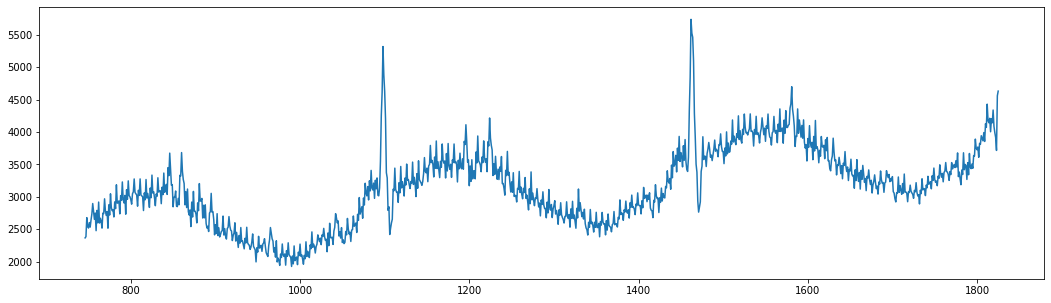

In [30]:
forecast['yhat731'].plot(figsize=(18,5));

In [31]:
forecast['yhat731'][1461:1480]

1461    4845.144043
1462     5739.59082
1463    5526.183594
1464    5462.949219
1465    5098.477539
1466    4286.017578
1467    3927.859619
1468    3502.964844
1469     3380.98877
1470    2934.984863
1471    2764.345703
1472    2838.281738
1473    2921.807129
1474    3392.166992
1475    3473.539307
1476    3927.536865
1477    3575.397949
1478    3626.629395
1479    3624.635254
Name: yhat731, dtype: object

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)



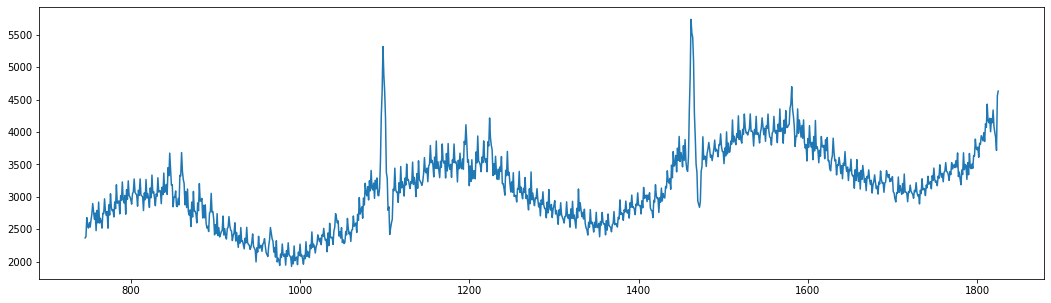

In [32]:
fixed_forecast = forecast.copy()
fixed_forecast['yhat731'].iloc[1471] = (fixed_forecast['yhat731'].iloc[1470] + fixed_forecast['yhat731'].iloc[1472]) / 2
fixed_forecast['yhat731'].plot(figsize=(18,5));

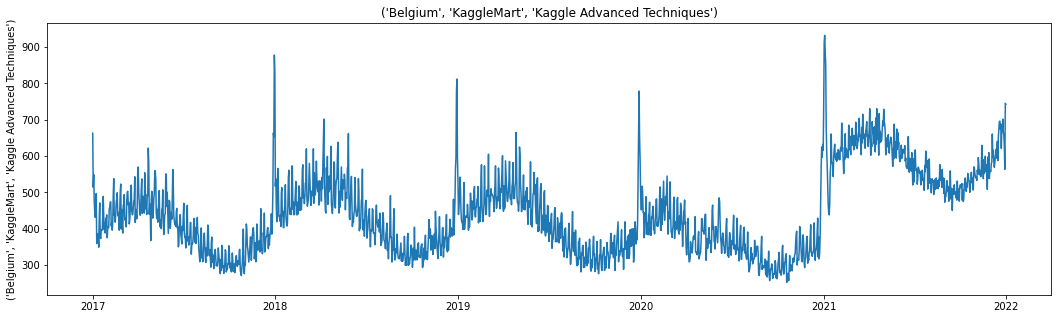

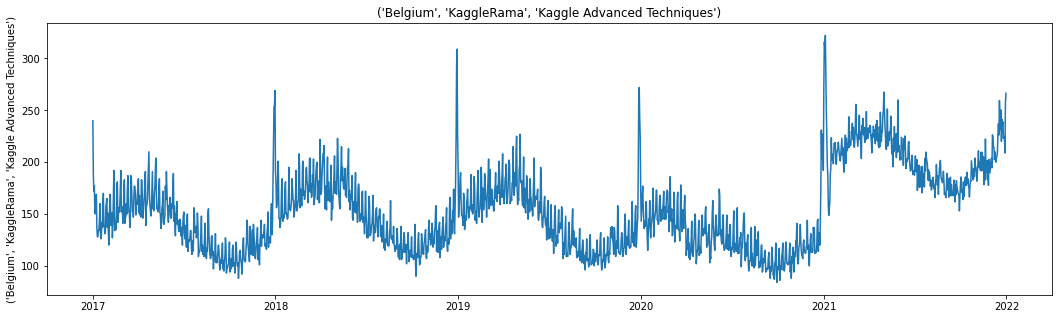

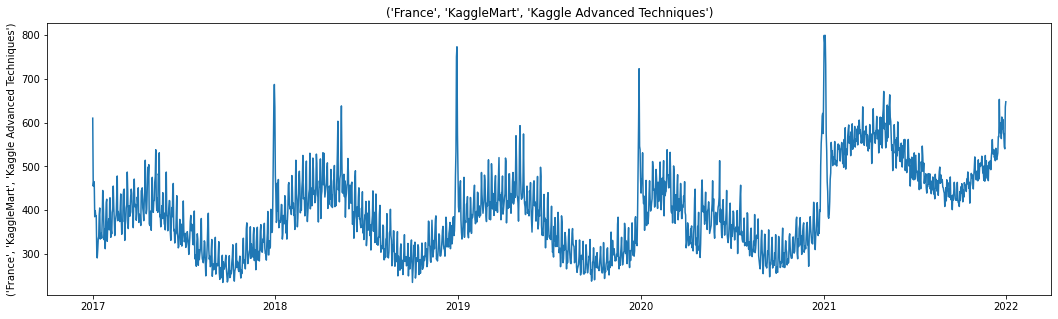

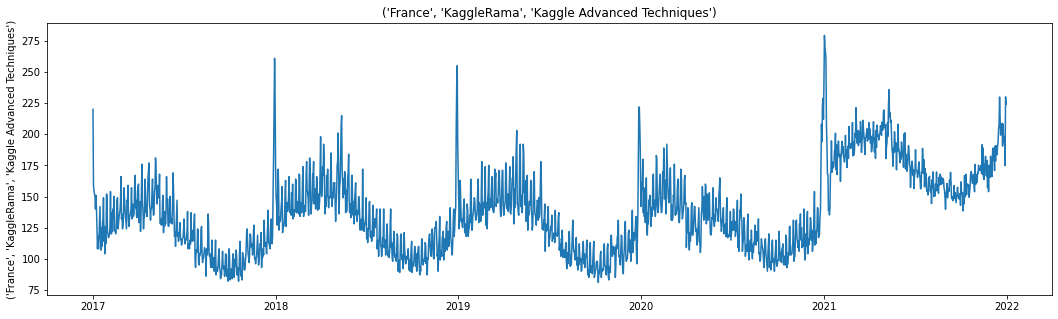

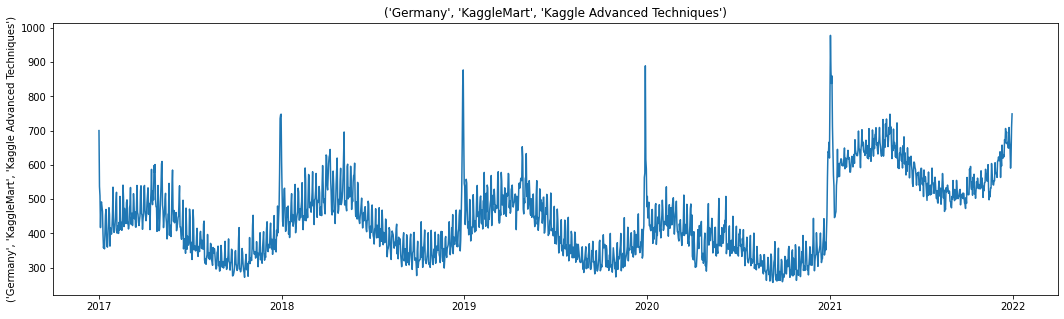

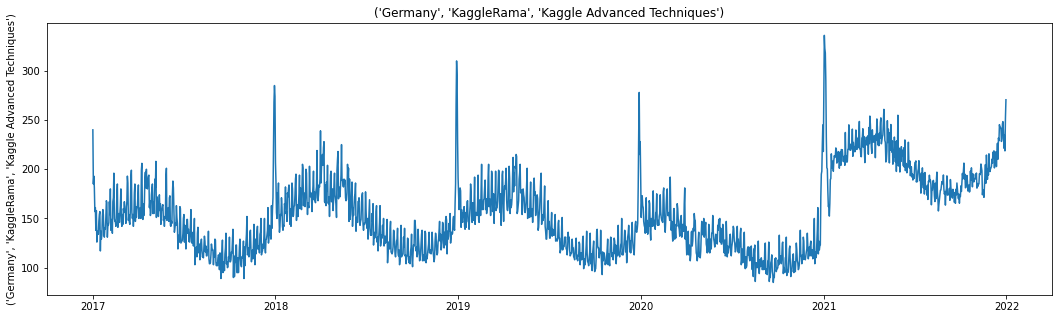

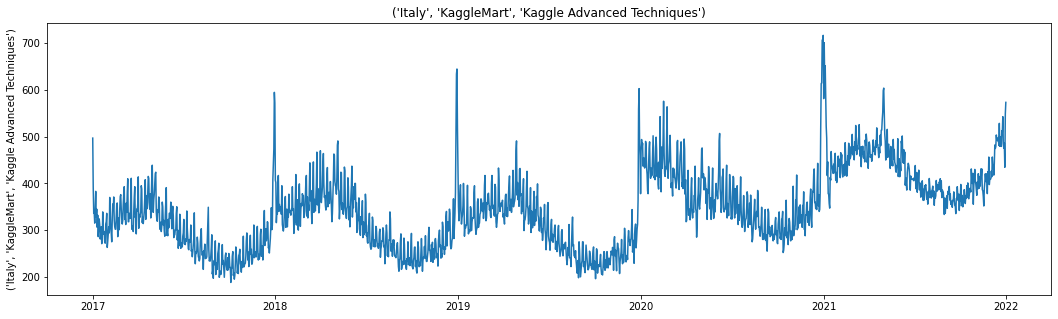

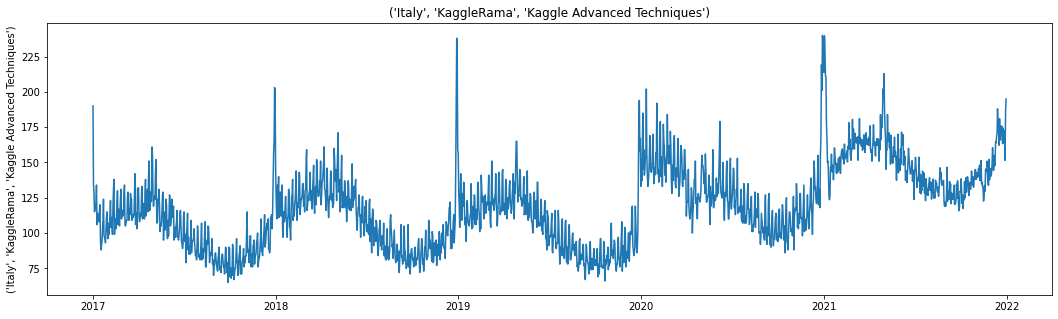

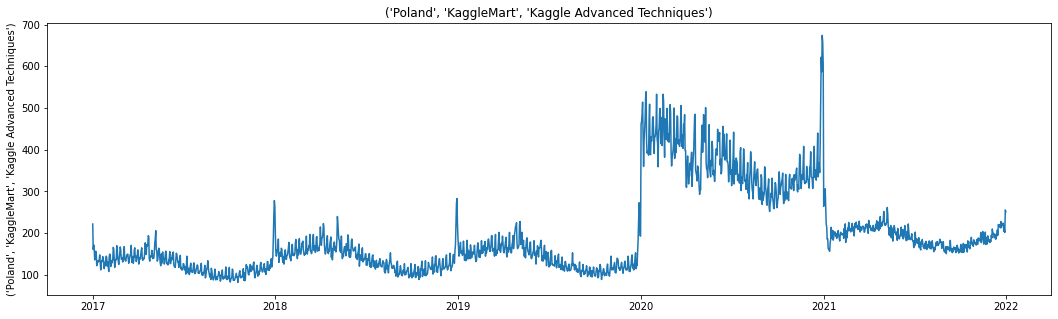

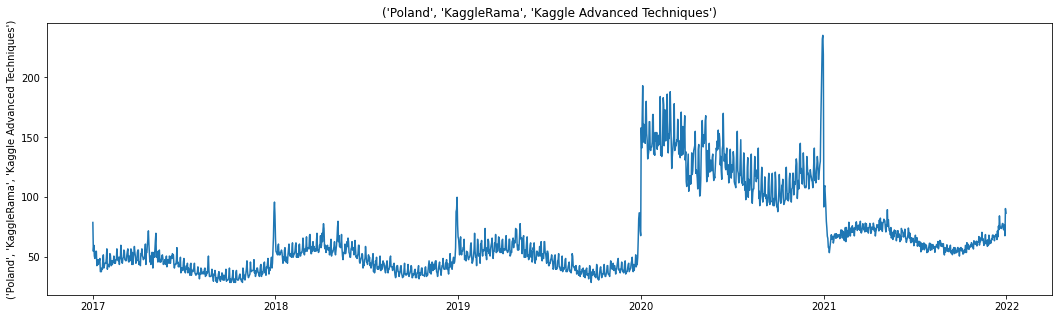

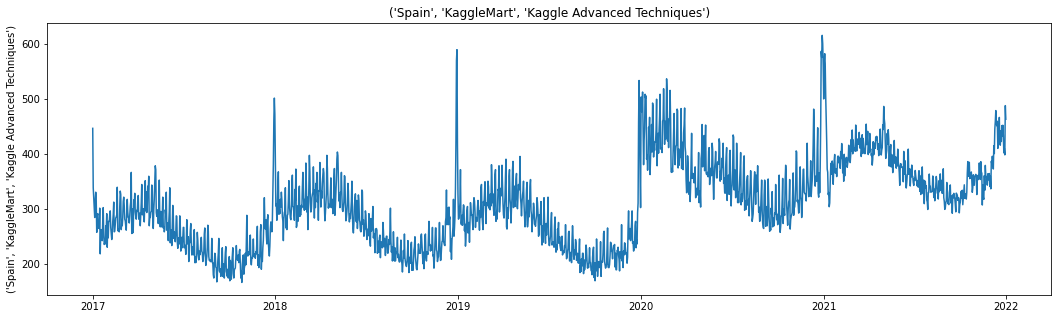

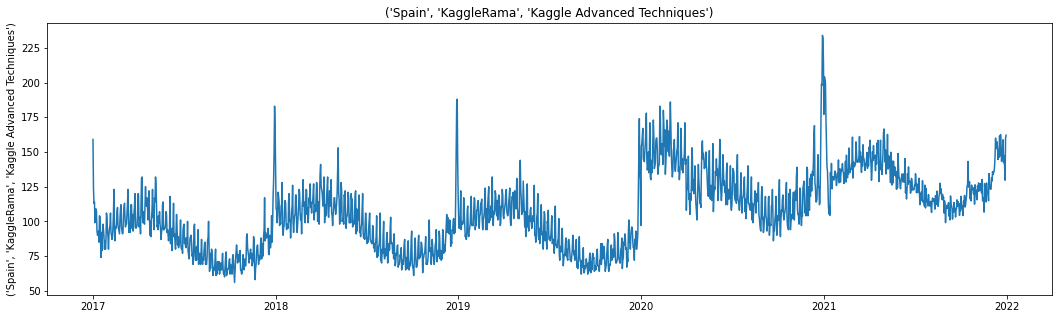

In [33]:
real_kag = train_dataset[train_dataset['product'] == 'Kaggle Advanced Techniques'].iloc[:,1:].pivot(index = 'date', columns = ['country', 'store', 'product'], values = 'num_sold')
full_kag = pd.concat([real_kag, desagregar_pronostico('Kaggle Advanced Techniques', fixed_forecast)], axis = 0)
for column in full_kag.columns:
    plt.subplots(figsize=(18,5))
    sns.lineplot(data=full_kag, x=full_kag.index, y=column).set_title(column);

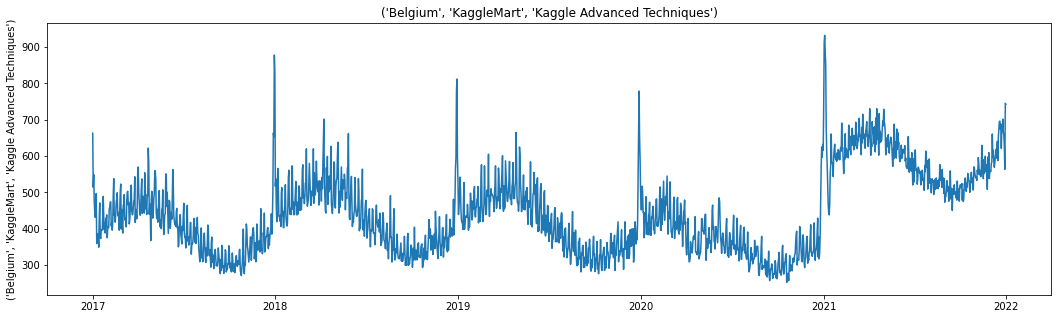

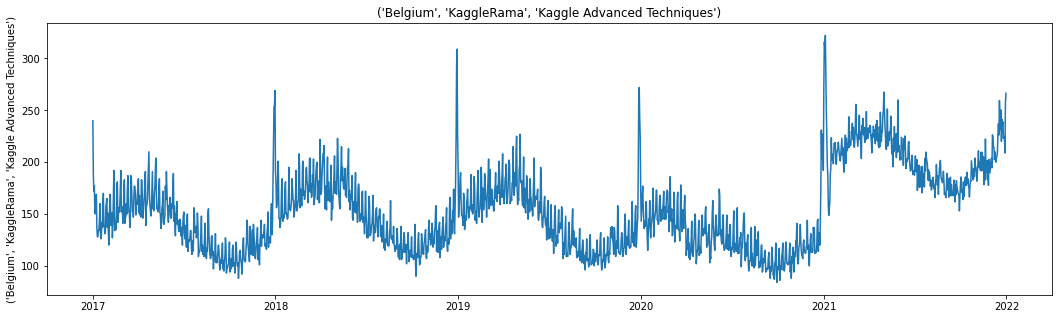

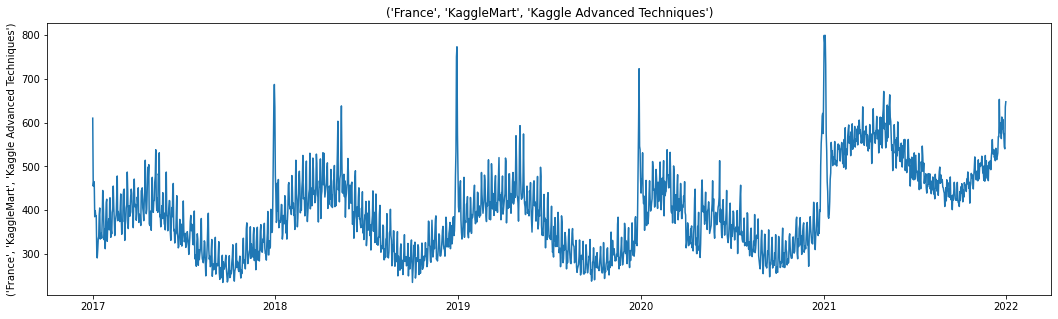

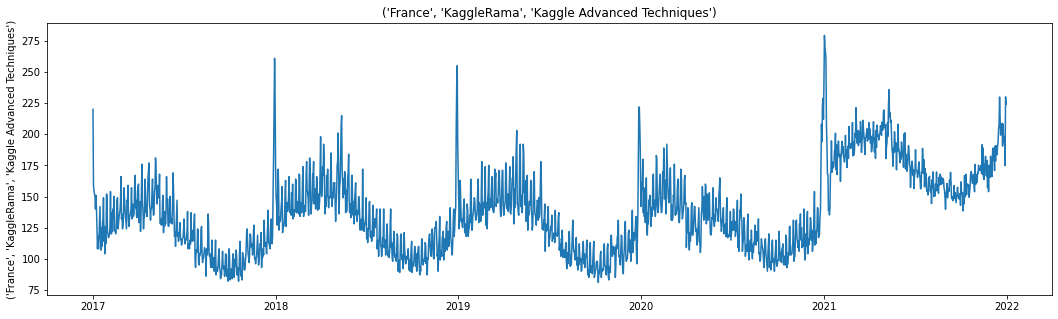

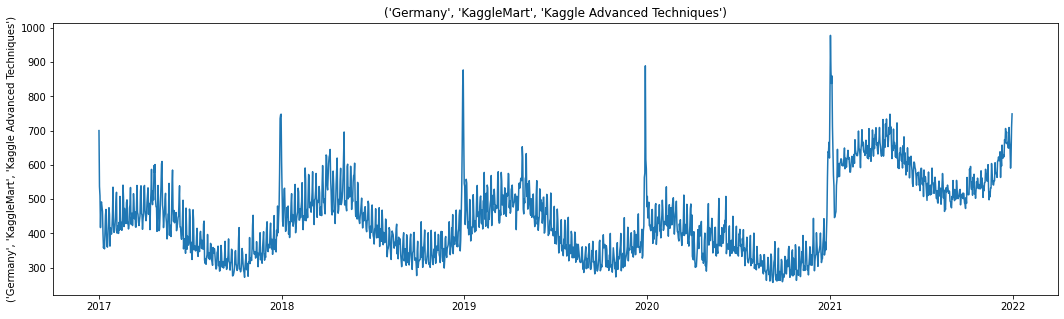

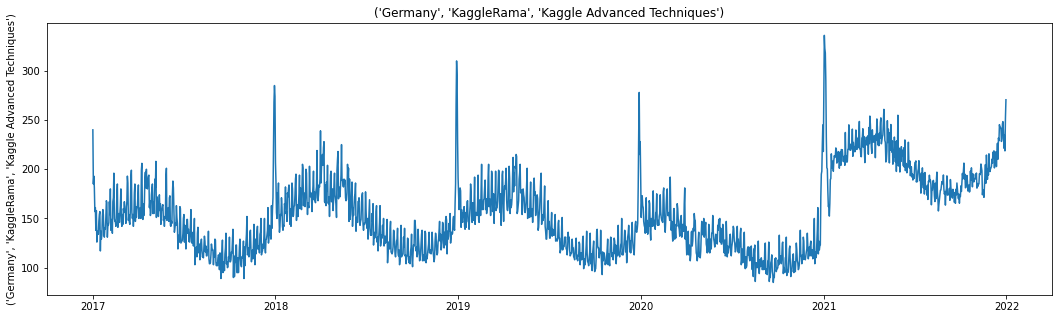

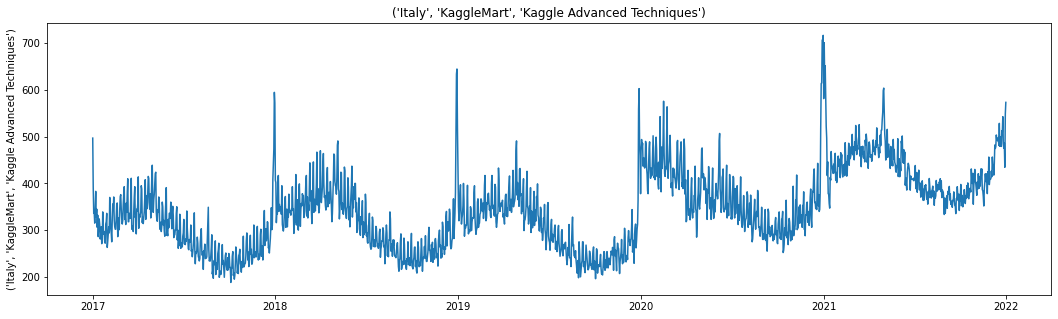

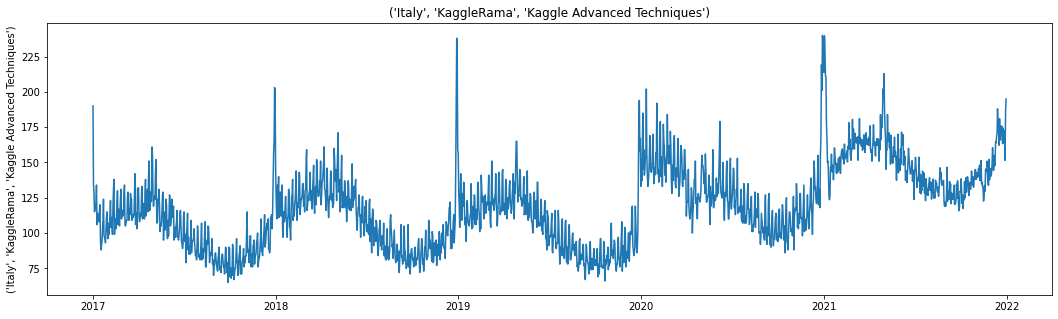

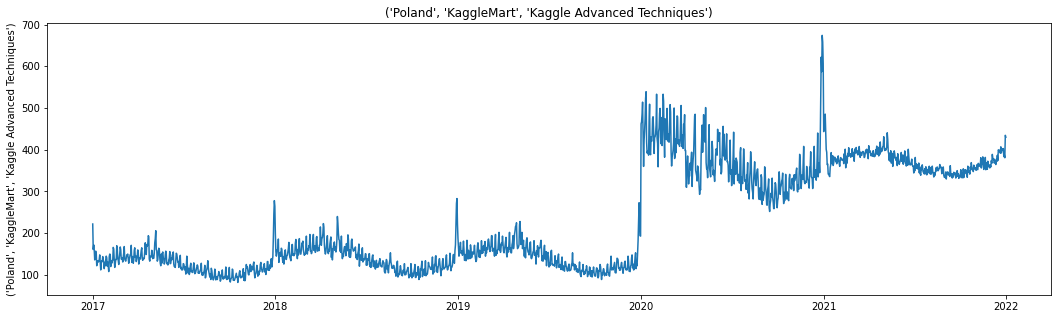

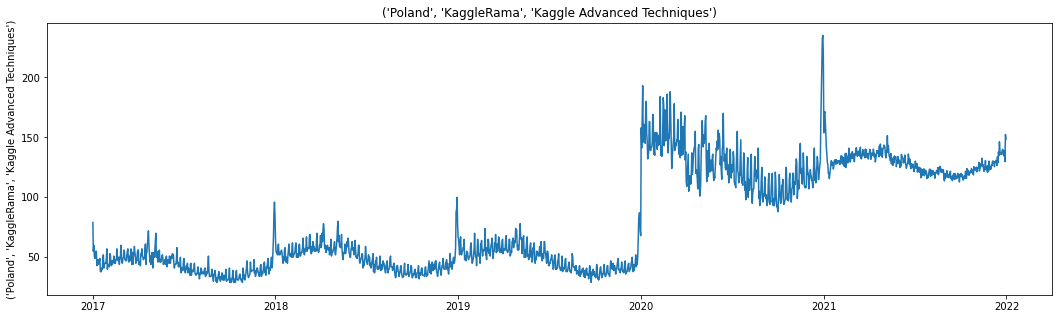

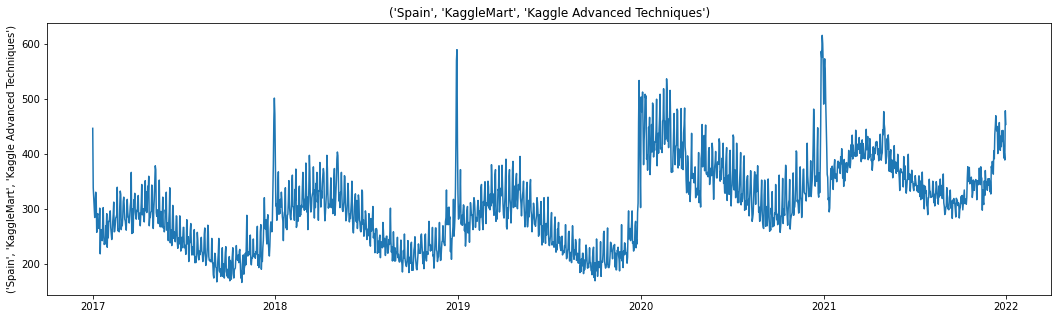

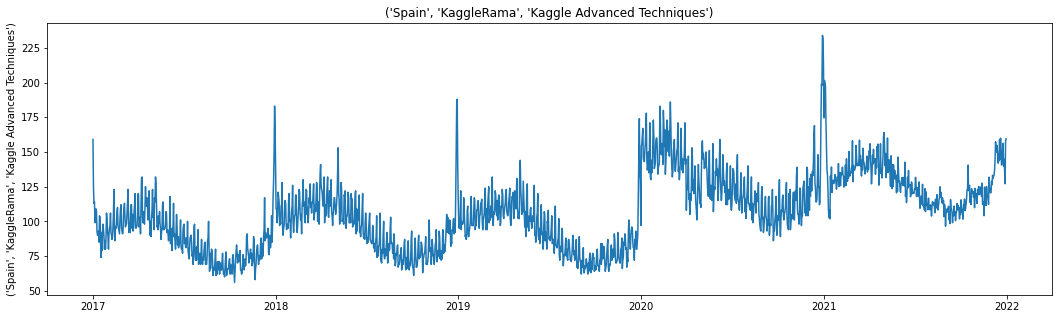

In [34]:
real_kag = train_dataset[train_dataset['product'] == 'Kaggle Advanced Techniques'].iloc[:,1:].pivot(index = 'date', columns = ['country', 'store', 'product'], values = 'num_sold')
full_kag = pd.concat([real_kag, desagregar_pronostico('Kaggle Advanced Techniques', fixed_forecast)], axis = 0)

full_kag['Poland', 'KaggleMart', 'Kaggle Advanced Techniques'].iloc[1461:] = full_kag['Poland', 'KaggleMart', 'Kaggle Advanced Techniques'].iloc[1461:] - (full_kag['Poland', 'KaggleMart', 'Kaggle Advanced Techniques'].iloc[1461:].mean())
full_kag['Poland', 'KaggleRama', 'Kaggle Advanced Techniques'].iloc[1461:] = full_kag['Poland', 'KaggleRama', 'Kaggle Advanced Techniques'].iloc[1461:] - (full_kag['Poland', 'KaggleRama', 'Kaggle Advanced Techniques'].iloc[1461:].mean())
full_kag['Spain', 'KaggleMart', 'Kaggle Advanced Techniques'].iloc[1461:] = full_kag['Spain', 'KaggleMart', 'Kaggle Advanced Techniques'].iloc[1461:] - (full_kag['Spain', 'KaggleMart', 'Kaggle Advanced Techniques'].iloc[1461:].mean())
full_kag['Spain', 'KaggleRama', 'Kaggle Advanced Techniques'].iloc[1461:] = full_kag['Spain', 'KaggleRama', 'Kaggle Advanced Techniques'].iloc[1461:] - (full_kag['Spain', 'KaggleRama', 'Kaggle Advanced Techniques'].iloc[1461:].mean())

full_kag['Poland', 'KaggleMart', 'Kaggle Advanced Techniques'].iloc[1461:] = full_kag['Poland', 'KaggleMart', 'Kaggle Advanced Techniques'].iloc[1461:] + (full_kag['Poland', 'KaggleMart', 'Kaggle Advanced Techniques'].iloc[1095:1461].mean() * 1)
full_kag['Poland', 'KaggleRama', 'Kaggle Advanced Techniques'].iloc[1461:] = full_kag['Poland', 'KaggleRama', 'Kaggle Advanced Techniques'].iloc[1461:] + (full_kag['Poland', 'KaggleRama', 'Kaggle Advanced Techniques'].iloc[1095:1461].mean() * 1)
full_kag['Spain', 'KaggleMart', 'Kaggle Advanced Techniques'].iloc[1461:] = full_kag['Spain', 'KaggleMart', 'Kaggle Advanced Techniques'].iloc[1461:] + (full_kag['Spain', 'KaggleMart', 'Kaggle Advanced Techniques'].iloc[1095:1461].mean() * 1)
full_kag['Spain', 'KaggleRama', 'Kaggle Advanced Techniques'].iloc[1461:] = full_kag['Spain', 'KaggleRama', 'Kaggle Advanced Techniques'].iloc[1461:] + (full_kag['Spain', 'KaggleRama', 'Kaggle Advanced Techniques'].iloc[1095:1461].mean() * 1)

for column in full_kag.columns:
    plt.subplots(figsize=(18,5))
    sns.lineplot(data=full_kag, x=full_kag.index, y=column).set_title(column);

In [35]:
full_kag

country                       Belgium                             \
store                      KaggleMart                 KaggleRama   
product    Kaggle Advanced Techniques Kaggle Advanced Techniques   
2017-01-01                        663                        240   
2017-01-02                        514                        187   
2017-01-03                        549                        172   
2017-01-04                        477                        177   
2017-01-05                        447                        150   
...                               ...                        ...   
2021-12-27                 660.434742                 223.954849   
2021-12-28                 629.008784                 224.611844   
2021-12-29                 563.362957                 208.819075   
2021-12-30                  745.28558                 257.481527   
2021-12-31                 742.443734                 266.533126   

country                        France                             \
store                      KaggleMart                 KaggleRama   
product    Kaggle Advanced Techniques Kaggle Advanced Techniques   
2017-01-01                        610                        220   
2017-01-02                        455                        159   
2017-01-03                        465                        155   
2017-01-04                        465                        152   
2017-01-05                        385                        150   
...                               ...                        ...   
2021-12-27                 572.230333                 193.444104   
2021-12-28                 544.211132                 197.524968   
2021-12-29                 540.086797                 174.798061   
2021-12-30                 635.763222                 230.015094   
2021-12-31                 647.557526                 224.078199   

country                       Germany                             \
store                      KaggleMart                 KaggleRama   
product    Kaggle Advanced Techniques Kaggle Advanced Techniques   
2017-01-01                        700                        240   
2017-01-02                        537                        185   
2017-01-03                        510                        193   
2017-01-04                        417                        181   
2017-01-05                        484                        157   
...                               ...                        ...   
2021-12-27                 645.351595                 221.358983   
2021-12-28                 590.522236                 234.605989   
2021-12-29                 626.413383                 218.615584   
2021-12-30                 709.767575                 252.110196   
2021-12-31                 748.853206                 270.571695   

country                         Italy                             \
store                      KaggleMart                 KaggleRama   
product    Kaggle Advanced Techniques Kaggle Advanced Techniques   
2017-01-01                        497                        190   
2017-01-02                        391                        135   
2017-01-03                        336                        128   
2017-01-04                        337                        115   
2017-01-05                        315                        116   
...                               ...                        ...   
2021-12-27                 475.548922                 172.510833   
2021-12-28                 486.580172                   172.2402   
2021-12-29                 434.537793                 151.472328   
2021-12-30                 548.627777                 186.199507   
2021-12-31                 573.524994                 194.944431   

country                        Poland                             \
store                      KaggleMart                 KaggleRama   
product    Kaggle Advanced Techniques Kaggle Advance

### kgs

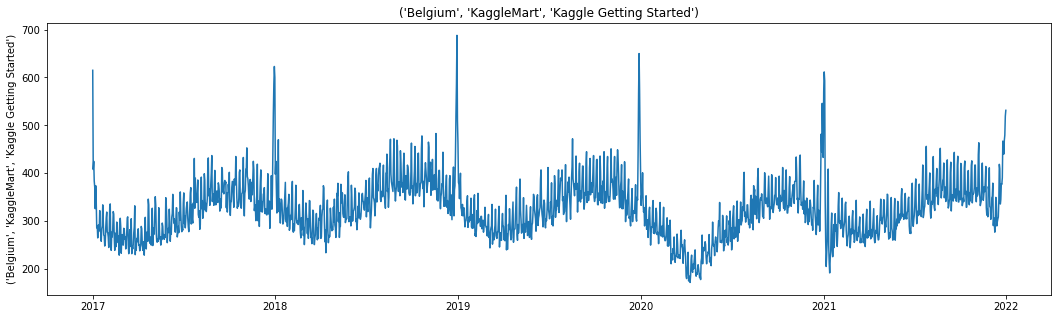

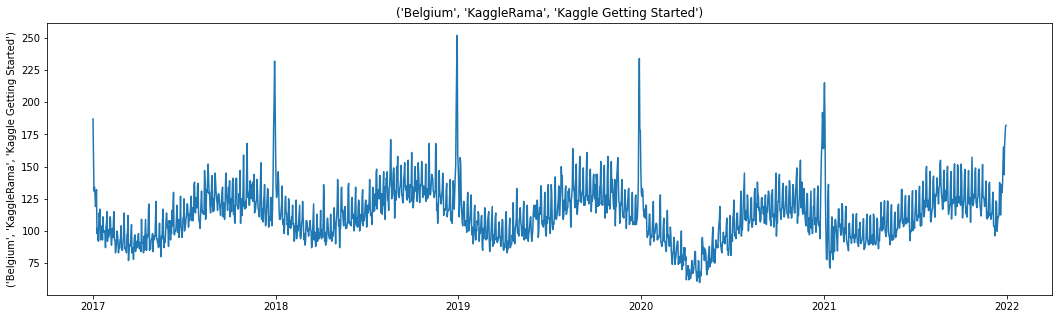

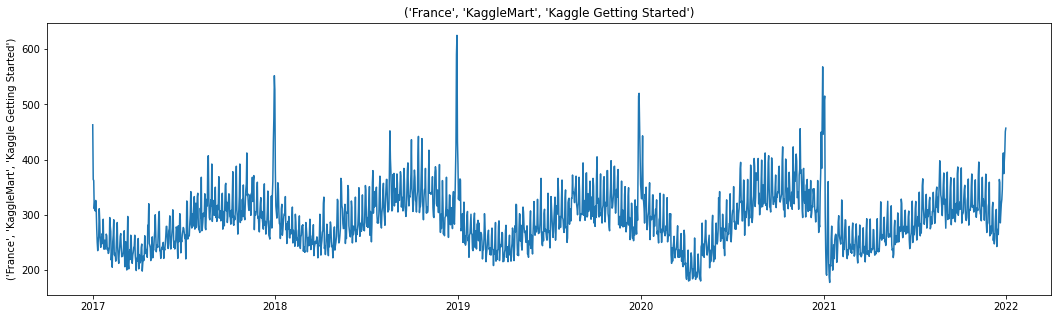

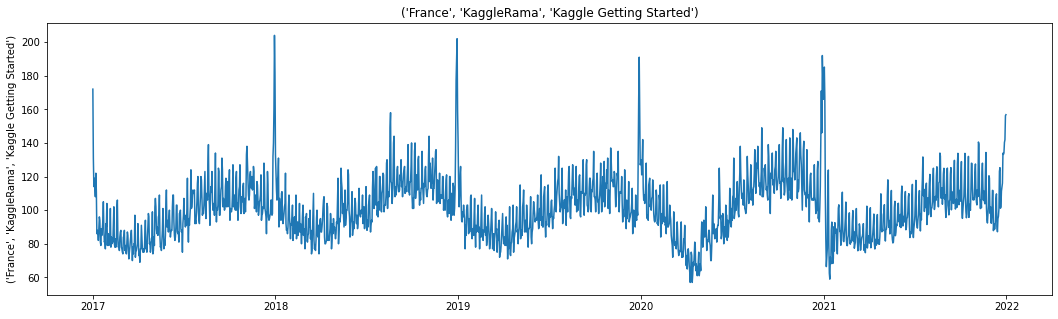

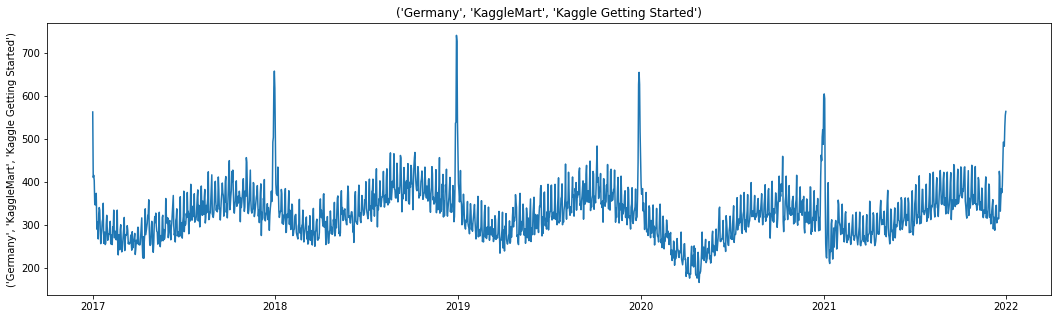

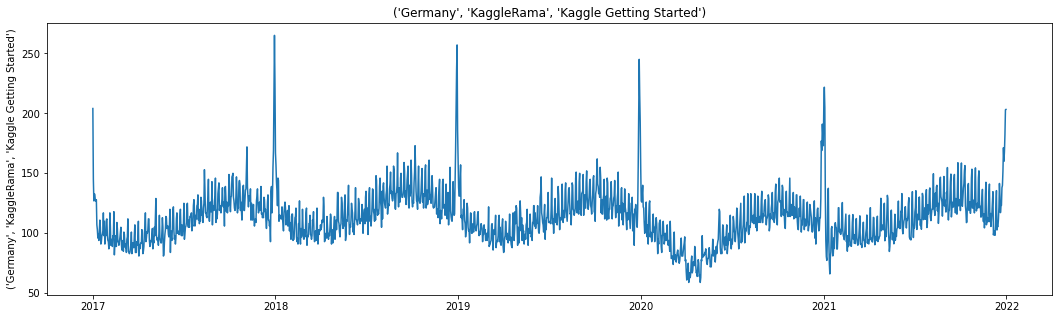

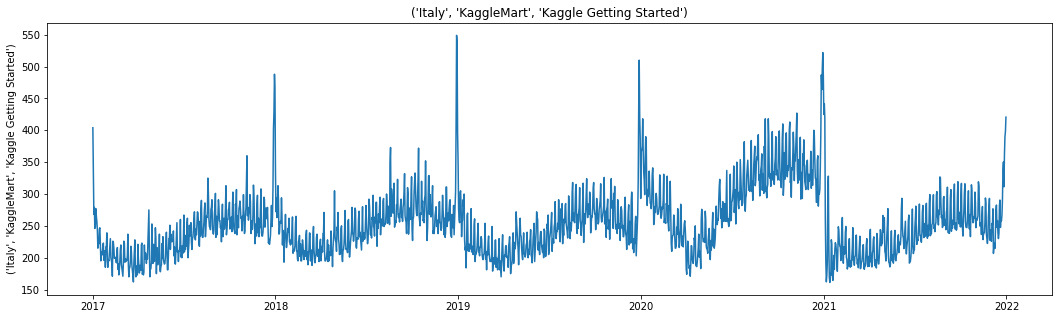

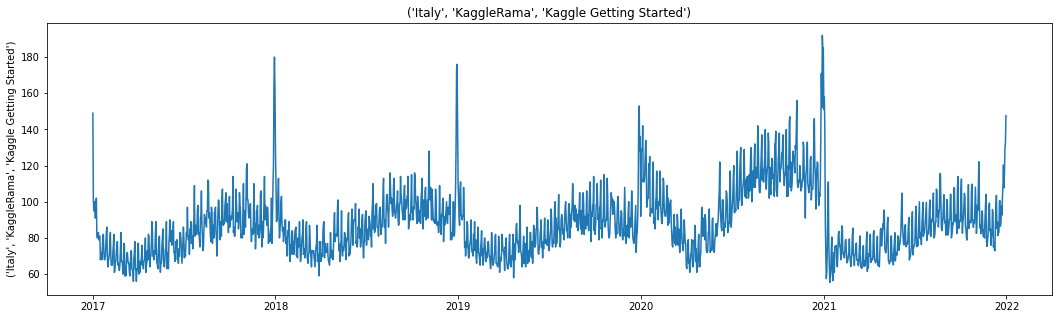

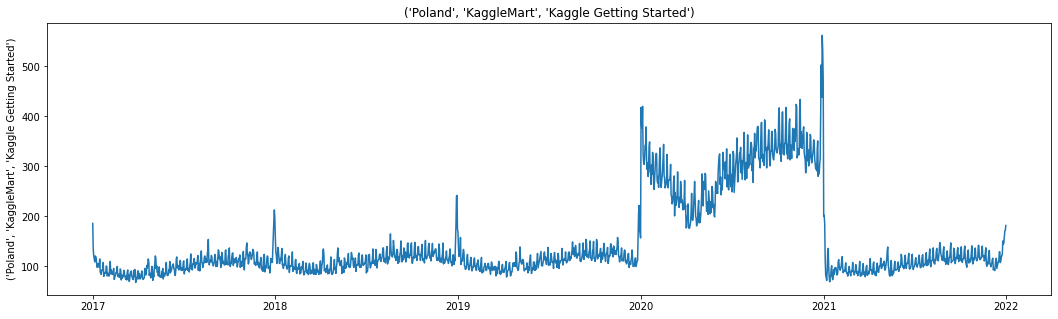

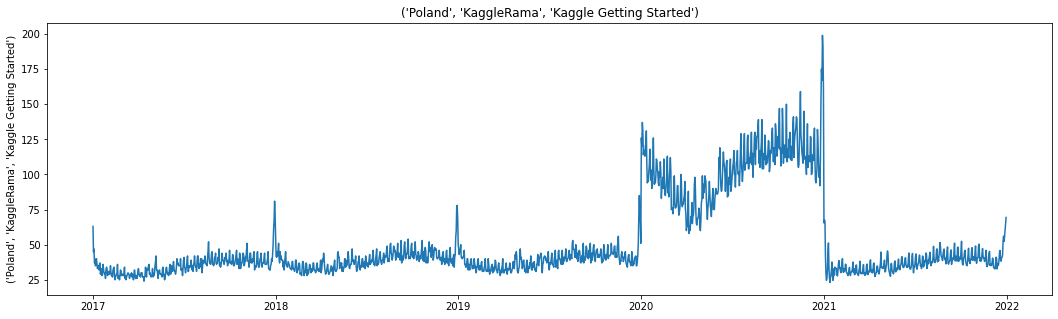

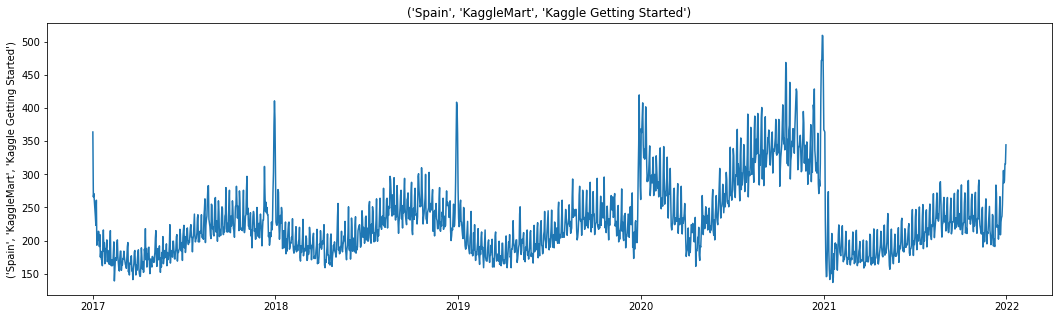

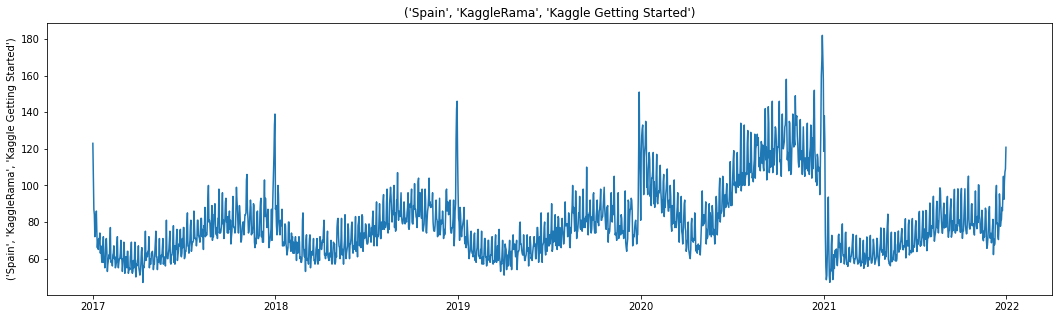

In [36]:
real_kgs = train_dataset[train_dataset['product'] == 'Kaggle Getting Started'].iloc[:,1:].pivot(index = 'date', columns = ['country', 'store', 'product'], values = 'num_sold')
full_kgs = pd.concat([real_kgs, desagregar_pronostico('Kaggle Getting Started', forecast2)], axis = 0)
for column in full_kgs.columns:
    plt.subplots(figsize=(18,5))
    sns.lineplot(data=full_kgs, x=full_kgs.index, y=column).set_title(column);

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)



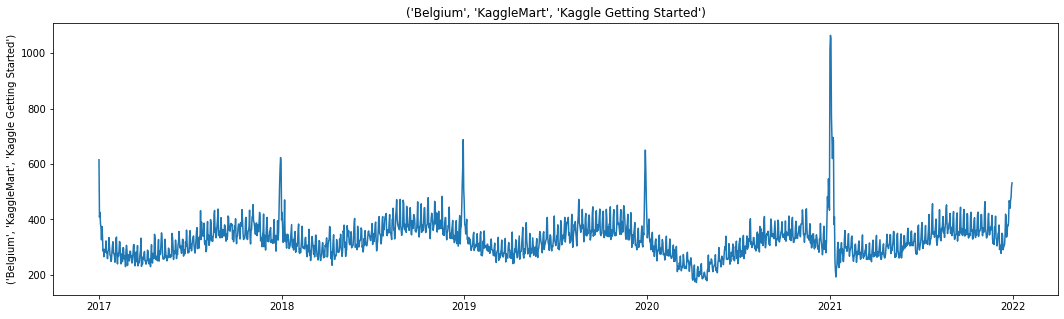

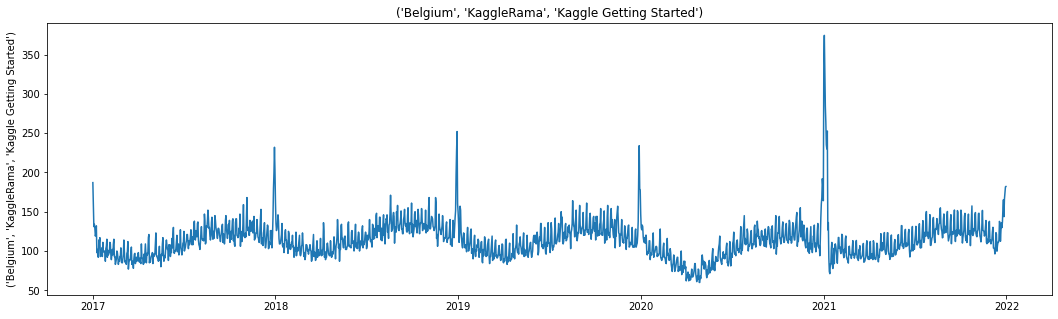

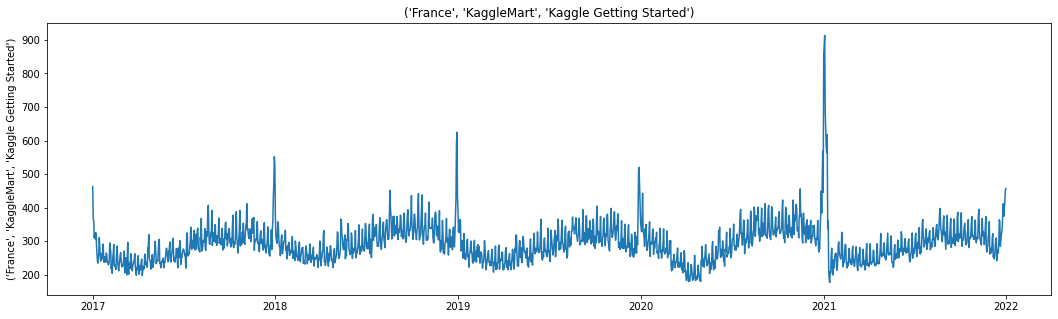

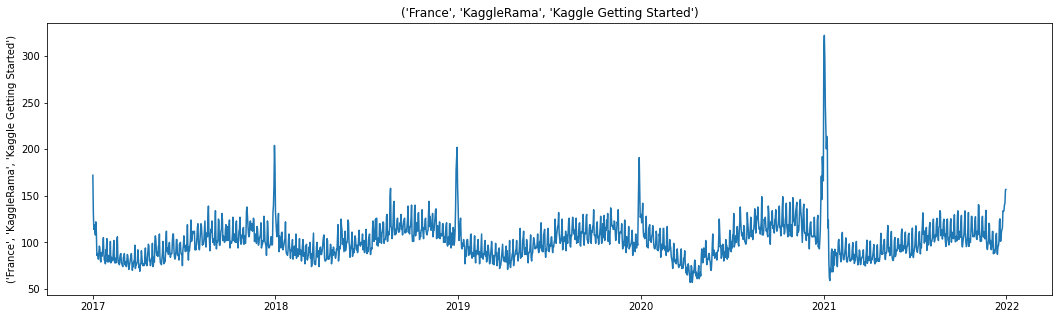

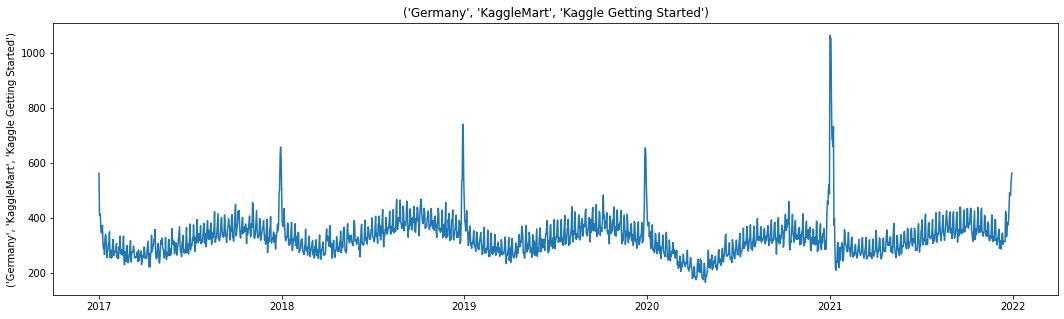

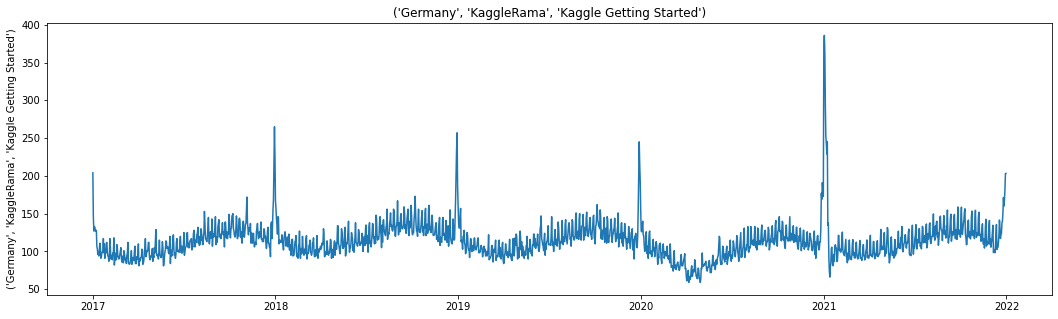

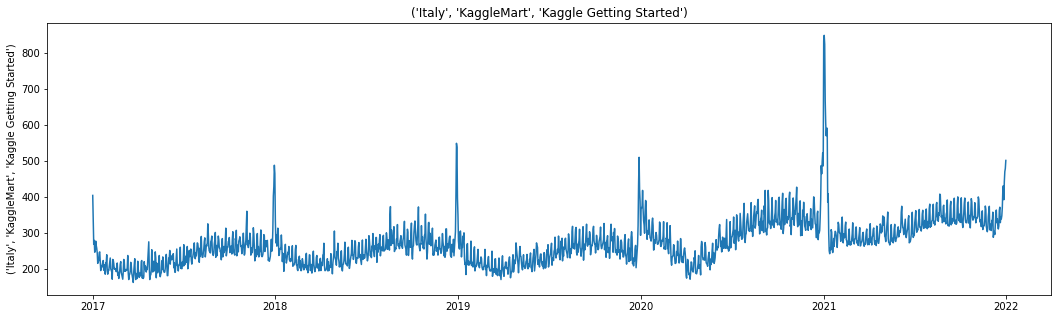

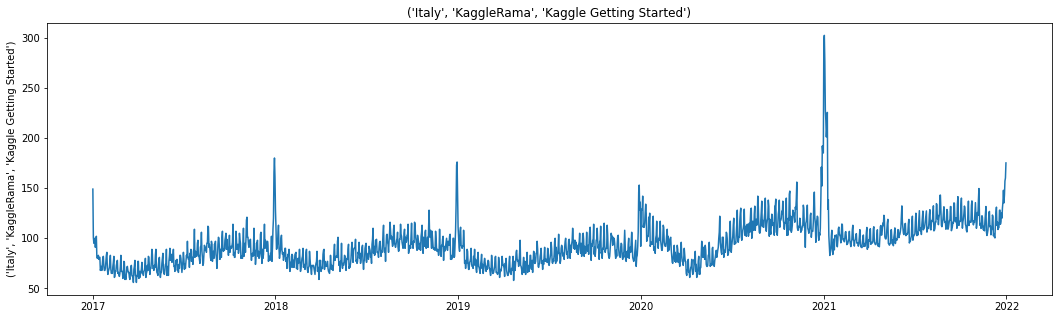

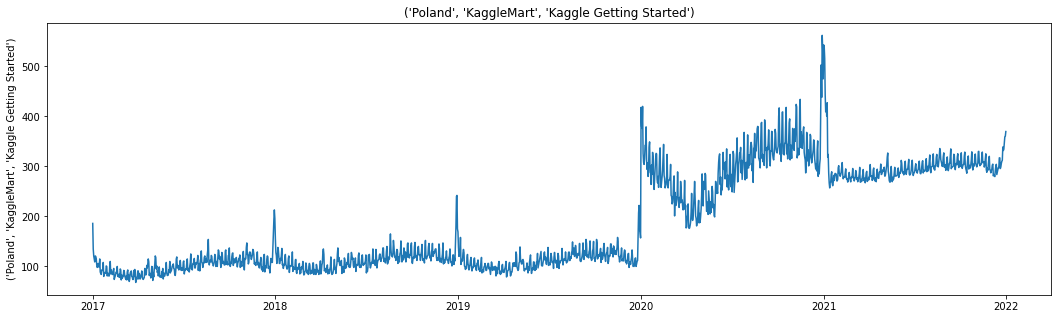

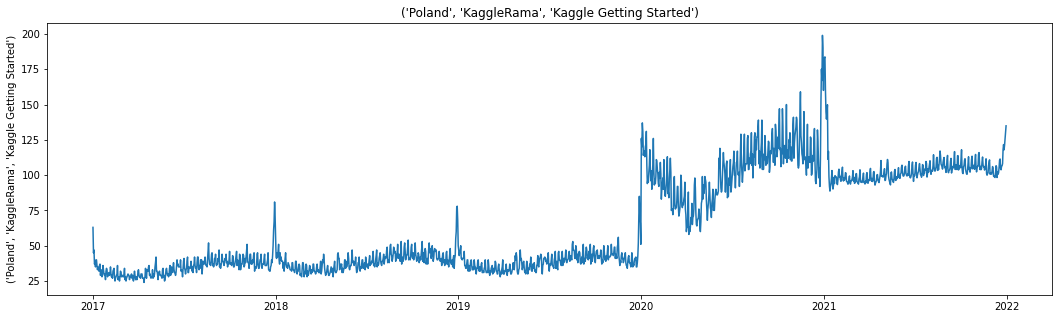

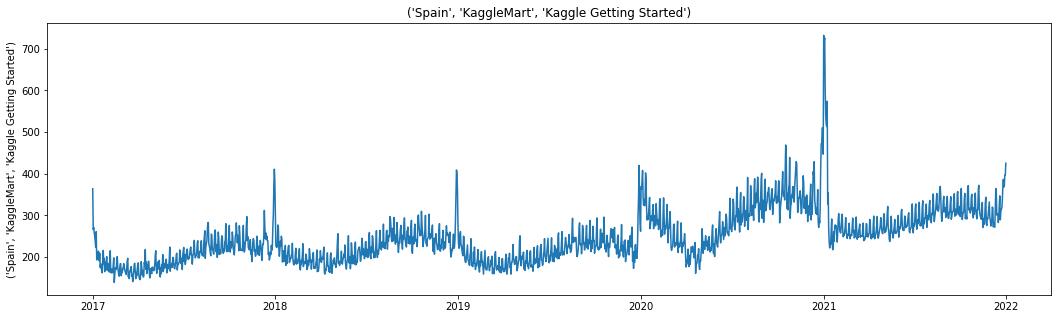

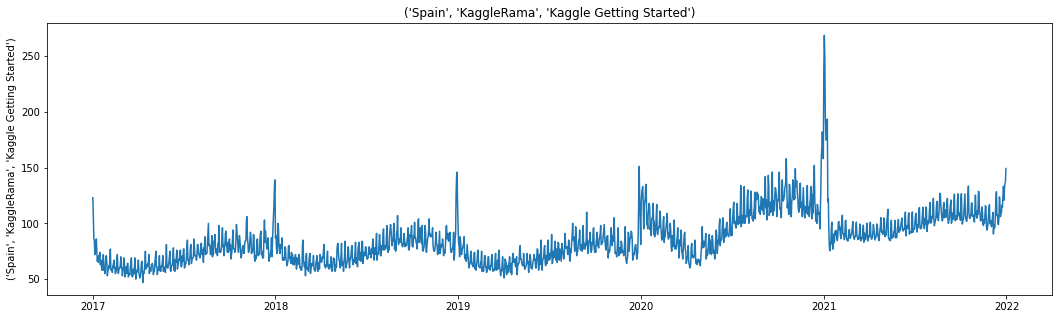

In [37]:
fixed_forecast2 = forecast2.copy()
fixed_forecast2['yhat731'].iloc[1460:1469] = fixed_forecast2['yhat731'].iloc[1460:1469] + fixed_forecast2['yhat731'].iloc[1460-366:1469-366].mean()
real_kgs = train_dataset[train_dataset['product'] == 'Kaggle Getting Started'].iloc[:,1:].pivot(index = 'date', columns = ['country', 'store', 'product'], values = 'num_sold')
full_kgs = pd.concat([real_kgs, desagregar_pronostico('Kaggle Getting Started', fixed_forecast2)], axis = 0)

full_kgs['Italy', 'KaggleMart', 'Kaggle Getting Started'].iloc[1461:] = full_kgs['Italy', 'KaggleMart', 'Kaggle Getting Started'].iloc[1461:] - full_kgs['Italy', 'KaggleMart', 'Kaggle Getting Started'].iloc[1461:].mean()
full_kgs['Italy', 'KaggleRama', 'Kaggle Getting Started'].iloc[1461:] = full_kgs['Italy', 'KaggleRama', 'Kaggle Getting Started'].iloc[1461:] - full_kgs['Italy', 'KaggleRama', 'Kaggle Getting Started'].iloc[1461:].mean()
full_kgs['Poland', 'KaggleMart', 'Kaggle Getting Started'].iloc[1461:] = full_kgs['Poland', 'KaggleMart', 'Kaggle Getting Started'].iloc[1461:] - full_kgs['Poland', 'KaggleMart', 'Kaggle Getting Started'].iloc[1461:].mean()
full_kgs['Poland', 'KaggleRama', 'Kaggle Getting Started'].iloc[1461:] = full_kgs['Poland', 'KaggleRama', 'Kaggle Getting Started'].iloc[1461:] - full_kgs['Poland', 'KaggleRama', 'Kaggle Getting Started'].iloc[1461:].mean()
full_kgs['Spain', 'KaggleMart', 'Kaggle Getting Started'].iloc[1461:] = full_kgs['Spain', 'KaggleMart', 'Kaggle Getting Started'].iloc[1461:] - full_kgs['Spain', 'KaggleMart', 'Kaggle Getting Started'].iloc[1461:].mean()
full_kgs['Spain', 'KaggleRama', 'Kaggle Getting Started'].iloc[1461:] = full_kgs['Spain', 'KaggleRama', 'Kaggle Getting Started'].iloc[1461:] - full_kgs['Spain', 'KaggleRama', 'Kaggle Getting Started'].iloc[1461:].mean()

full_kgs['Italy', 'KaggleMart', 'Kaggle Getting Started'].iloc[1461:] = full_kgs['Italy', 'KaggleMart', 'Kaggle Getting Started'].iloc[1461:] + full_kgs['Italy', 'KaggleMart', 'Kaggle Getting Started'].iloc[1095:1461].mean() * 1.1
full_kgs['Italy', 'KaggleRama', 'Kaggle Getting Started'].iloc[1461:] = full_kgs['Italy', 'KaggleRama', 'Kaggle Getting Started'].iloc[1461:] + full_kgs['Italy', 'KaggleRama', 'Kaggle Getting Started'].iloc[1095:1461].mean() * 1.1
full_kgs['Poland', 'KaggleMart', 'Kaggle Getting Started'].iloc[1461:] = full_kgs['Poland', 'KaggleMart', 'Kaggle Getting Started'].iloc[1461:] + full_kgs['Poland', 'KaggleMart', 'Kaggle Getting Started'].iloc[1095:1461].mean()
full_kgs['Poland', 'KaggleRama', 'Kaggle Getting Started'].iloc[1461:] = full_kgs['Poland', 'KaggleRama', 'Kaggle Getting Started'].iloc[1461:] + full_kgs['Poland', 'KaggleRama', 'Kaggle Getting Started'].iloc[1095:1461].mean()
full_kgs['Spain', 'KaggleMart', 'Kaggle Getting Started'].iloc[1461:] = full_kgs['Spain', 'KaggleMart', 'Kaggle Getting Started'].iloc[1461:] + full_kgs['Spain', 'KaggleMart', 'Kaggle Getting Started'].iloc[1095:1461].mean()
full_kgs['Spain', 'KaggleRama', 'Kaggle Getting Started'].iloc[1461:] = full_kgs['Spain', 'KaggleRama', 'Kaggle Getting Started'].iloc[1461:] + full_kgs['Spain', 'KaggleRama', 'Kaggle Getting Started'].iloc[1095:1461].mean()

for column in full_kgs.columns:
    plt.subplots(figsize=(18,5))
    sns.lineplot(data=full_kgs, x=full_kgs.index, y=column).set_title(column);

In [38]:
full_kgs

country                   Belgium                         \
store                  KaggleMart             KaggleRama   
product    Kaggle Getting Started Kaggle Getting Started   
2017-01-01                    615                    187   
2017-01-02                    408                    158   
2017-01-03                    425                    131   
2017-01-04                    384                    134   
2017-01-05                    371                    129   
...                           ...                    ...   
2021-12-27               439.9941              143.69071   
2021-12-28             468.611662             166.127246   
2021-12-29             479.702892             173.686846   
2021-12-30             519.405545             181.595754   
2021-12-31              531.45135             182.065467   

country                    France                         \
store                  KaggleMart             KaggleRama   
product    Kaggle Getting Started Kaggle Getting Started   
2017-01-01                    463                    172   
2017-01-02                    364                    131   
2017-01-03                    362                    114   
2017-01-04                    311                    119   
2017-01-05                    323                    114   
...                           ...                    ...   
2021-12-27             374.519081             134.060005   
2021-12-28             397.813084             140.305274   
2021-12-29              415.10635             141.844036   
2021-12-30             450.693301             156.213736   
2021-12-31             456.936979             156.800079   

country                   Germany                         \
store                  KaggleMart             KaggleRama   
product    Kaggle Getting Started Kaggle Getting Started   
2017-01-01                    562                    204   
2017-01-02                    410                    145   
2017-01-03                    415                    127   
2017-01-04                    403                    133   
2017-01-05                    350                    132   
...                           ...                    ...   
2021-12-27             490.897969             160.010551   
2021-12-28             482.533806             168.028183   
2021-12-29             528.409055             182.209254   
2021-12-30             554.673823             202.999594   
2021-12-31             563.291294             203.243337   

country                     Italy                         \
store                  KaggleMart             KaggleRama   
product    Kaggle Getting Started Kaggle Getting Started   
2017-01-01                    404                    149   
2017-01-02                    330                    101   
2017-01-03                    268                     95   
2017-01-04                    279                     95   
2017-01-05                    246                    100   
...                           ...                    ...   
2021-12-27             391.994199             135.216409   
2021-12-28             442.364978             143.046598   
2021-12-29             470.191085             157.069472   
2021-12-30              478.92381             160.067151   
2021-12-31             501.355305             175.084337   

country                    Poland                         \
store                  KaggleMart             KaggleRama   
product    Kaggle Getting Started Kaggle Getting Started   
2017-01-01                    186                     63   
2017-01-02                    135                     45   
2017-01-03                    121                     47   
2017-01-04                    115                     37   
2017-01-05                    109                     38   
...                           ...                    ...   
2021-12-27             334.303041             117.902112   
2021-12-28             347.322365   

### krb

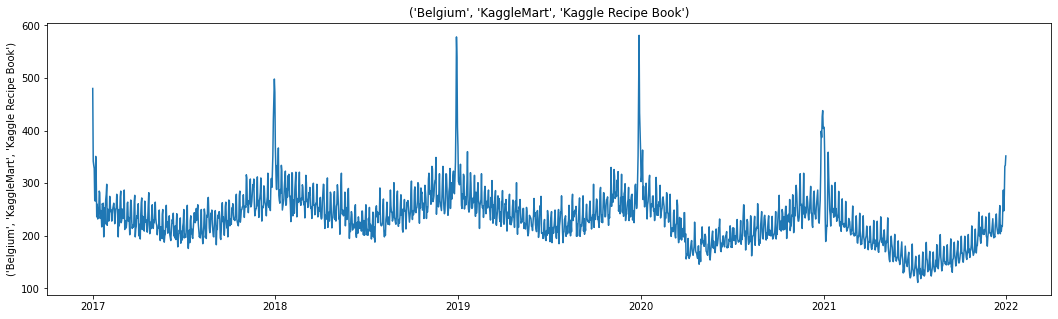

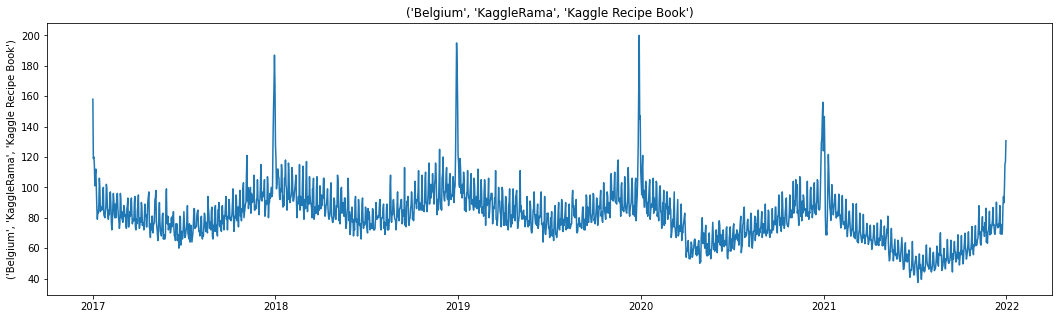

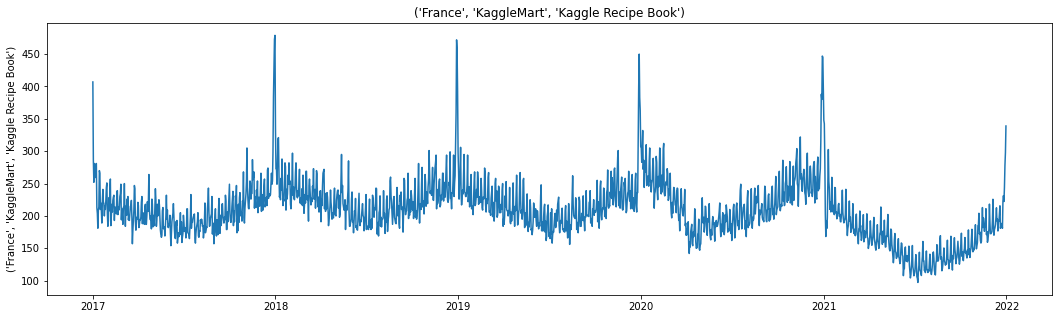

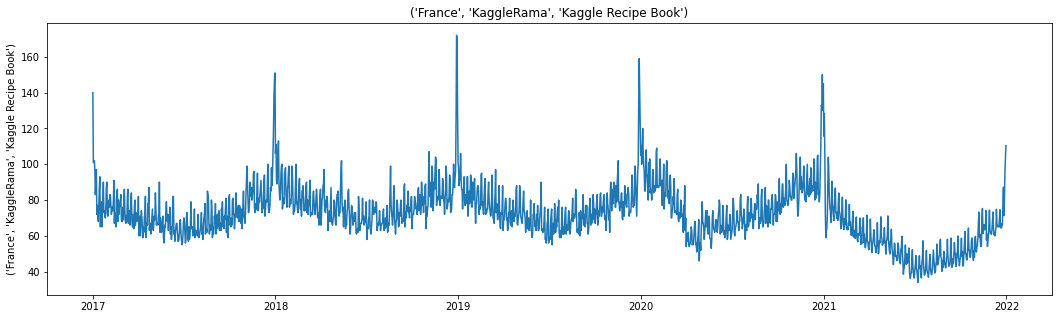

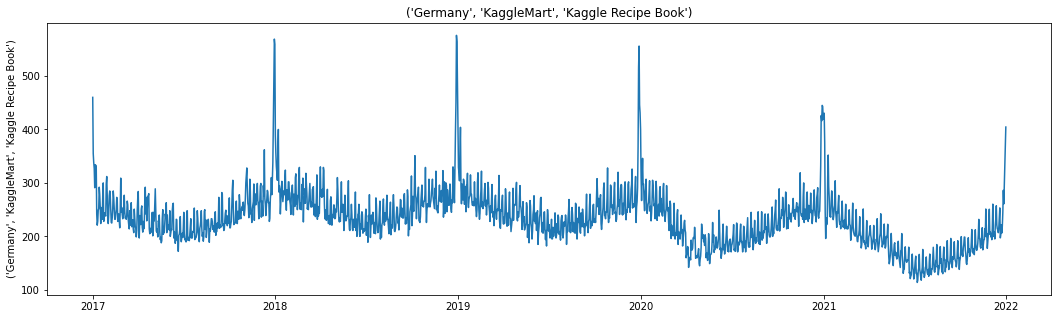

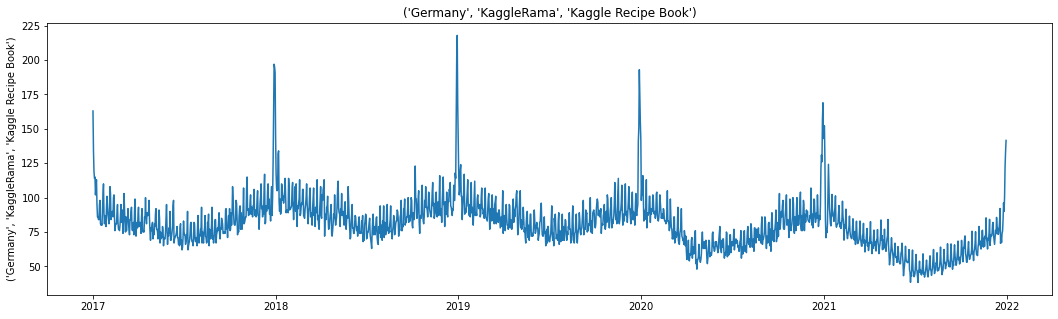

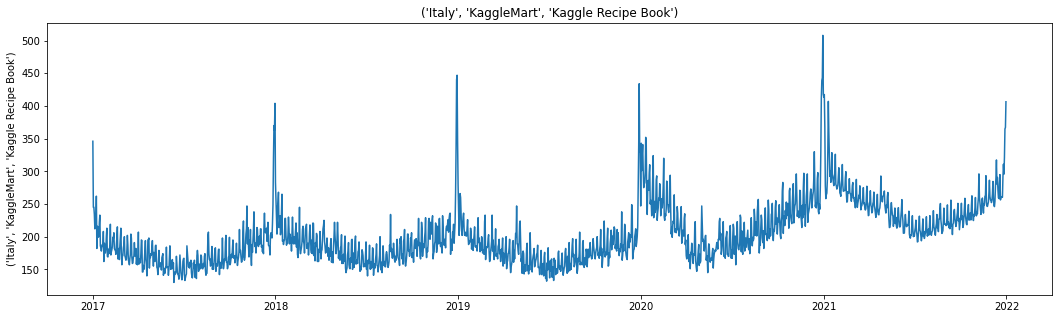

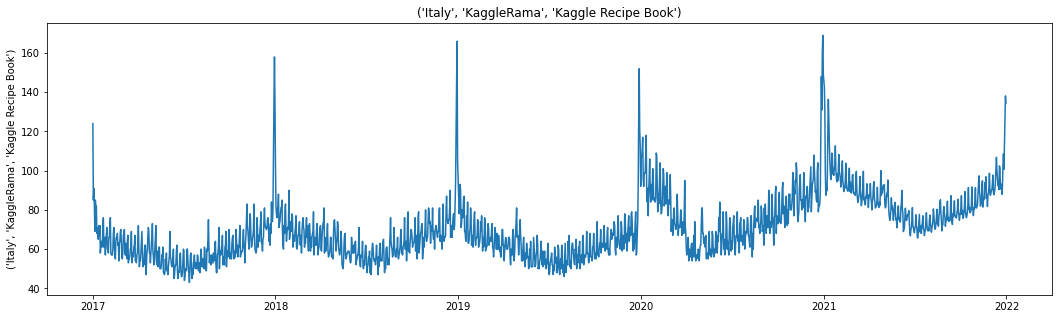

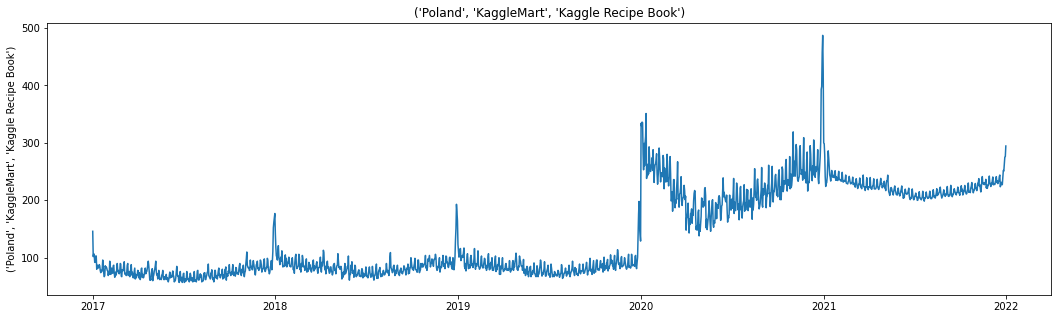

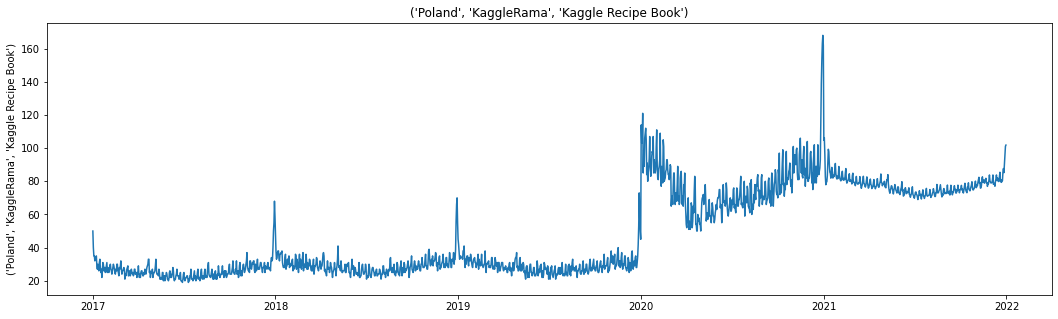

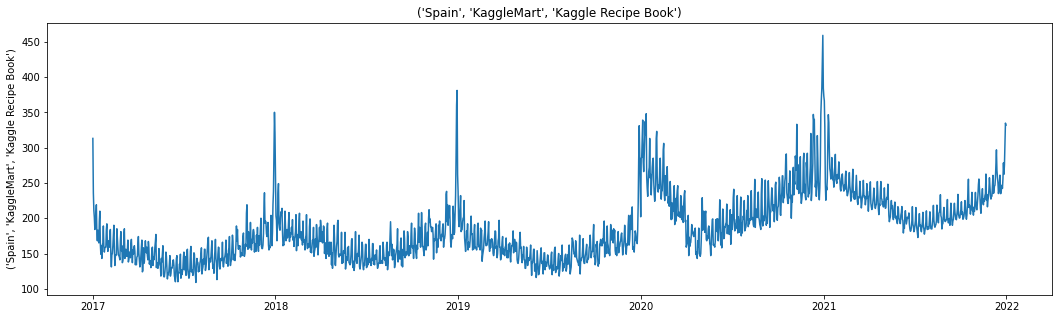

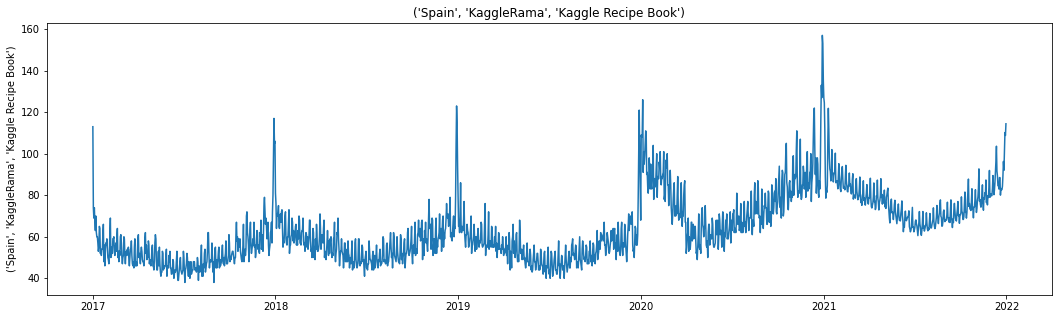

In [39]:
real_krb = train_dataset[train_dataset['product'] == 'Kaggle Recipe Book'].iloc[:,1:].pivot(index = 'date', columns = ['country', 'store', 'product'], values = 'num_sold')
full_krb = pd.concat([real_krb, desagregar_pronostico('Kaggle Recipe Book', forecast3)], axis = 0)

full_krb['Italy', 'KaggleMart', 'Kaggle Recipe Book'].iloc[1461:] = full_krb['Italy', 'KaggleMart', 'Kaggle Recipe Book'].iloc[1461:] - full_krb['Italy', 'KaggleMart', 'Kaggle Recipe Book'].iloc[1461:].mean()
full_krb['Italy', 'KaggleRama', 'Kaggle Recipe Book'].iloc[1461:] = full_krb['Italy', 'KaggleRama', 'Kaggle Recipe Book'].iloc[1461:] - full_krb['Italy', 'KaggleRama', 'Kaggle Recipe Book'].iloc[1461:].mean()
full_krb['Poland', 'KaggleMart', 'Kaggle Recipe Book'].iloc[1461:] = full_krb['Poland', 'KaggleMart', 'Kaggle Recipe Book'].iloc[1461:] - full_krb['Poland', 'KaggleMart', 'Kaggle Recipe Book'].iloc[1461:].mean()
full_krb['Poland', 'KaggleRama', 'Kaggle Recipe Book'].iloc[1461:] = full_krb['Poland', 'KaggleRama', 'Kaggle Recipe Book'].iloc[1461:] - full_krb['Poland', 'KaggleRama', 'Kaggle Recipe Book'].iloc[1461:].mean()
full_krb['Spain', 'KaggleMart', 'Kaggle Recipe Book'].iloc[1461:] = full_krb['Spain', 'KaggleMart', 'Kaggle Recipe Book'].iloc[1461:] - full_krb['Spain', 'KaggleMart', 'Kaggle Recipe Book'].iloc[1461:].mean()
full_krb['Spain', 'KaggleRama', 'Kaggle Recipe Book'].iloc[1461:] = full_krb['Spain', 'KaggleRama', 'Kaggle Recipe Book'].iloc[1461:] - full_krb['Spain', 'KaggleRama', 'Kaggle Recipe Book'].iloc[1461:].mean()

full_krb['Italy', 'KaggleMart', 'Kaggle Recipe Book'].iloc[1461:] = full_krb['Italy', 'KaggleMart', 'Kaggle Recipe Book'].iloc[1461:] + full_krb['Italy', 'KaggleMart', 'Kaggle Recipe Book'].iloc[1095:1461].mean() * 1.1
full_krb['Italy', 'KaggleRama', 'Kaggle Recipe Book'].iloc[1461:] = full_krb['Italy', 'KaggleRama', 'Kaggle Recipe Book'].iloc[1461:] + full_krb['Italy', 'KaggleRama', 'Kaggle Recipe Book'].iloc[1095:1461].mean() * 1.1
full_krb['Poland', 'KaggleMart', 'Kaggle Recipe Book'].iloc[1461:] = full_krb['Poland', 'KaggleMart', 'Kaggle Recipe Book'].iloc[1461:] + full_krb['Poland', 'KaggleMart', 'Kaggle Recipe Book'].iloc[1095:1461].mean()
full_krb['Poland', 'KaggleRama', 'Kaggle Recipe Book'].iloc[1461:] = full_krb['Poland', 'KaggleRama', 'Kaggle Recipe Book'].iloc[1461:] + full_krb['Poland', 'KaggleRama', 'Kaggle Recipe Book'].iloc[1095:1461].mean()
full_krb['Spain', 'KaggleMart', 'Kaggle Recipe Book'].iloc[1461:] = full_krb['Spain', 'KaggleMart', 'Kaggle Recipe Book'].iloc[1461:] + full_krb['Spain', 'KaggleMart', 'Kaggle Recipe Book'].iloc[1095:1461].mean()
full_krb['Spain', 'KaggleRama', 'Kaggle Recipe Book'].iloc[1461:] = full_krb['Spain', 'KaggleRama', 'Kaggle Recipe Book'].iloc[1461:] + full_krb['Spain', 'KaggleRama', 'Kaggle Recipe Book'].iloc[1095:1461].mean()

for column in full_krb.columns:
    plt.subplots(figsize=(18,5))
    sns.lineplot(data=full_krb, x=full_krb.index, y=column).set_title(column);

In [40]:
full_krb

country               Belgium                                France  \
store              KaggleMart         KaggleRama         KaggleMart   
product    Kaggle Recipe Book Kaggle Recipe Book Kaggle Recipe Book   
2017-01-01                480                158                407   
2017-01-02                342                119                286   
2017-01-03                334                120                252   
2017-01-04                328                115                281   
2017-01-05                268                101                259   
...                       ...                ...                ...   
2021-12-27         247.415477          89.820085         222.297894   
2021-12-28         277.383702          99.522996         244.082444   
2021-12-29         332.474483         115.417814         278.097697   
2021-12-30         333.876604         116.552788         298.129538   
2021-12-31         351.807425         130.715025         338.961494   

country                                  Germany                     \
store              KaggleRama         KaggleMart         KaggleRama   
product    Kaggle Recipe Book Kaggle Recipe Book Kaggle Recipe Book   
2017-01-01                140                460                163   
2017-01-02                101                355                134   
2017-01-03                101                338                119   
2017-01-04                102                327                114   
2017-01-05                 97                291                115   
...                       ...                ...                ...   
2021-12-27          71.377221         260.802955          89.976911   
2021-12-28          80.694149         295.558064         100.371332   
2021-12-29          96.430284         333.941643         122.439118   
2021-12-30         103.704184         358.007418         133.310312   
2021-12-31         110.416824          404.51876           141.6094   

country                 Italy                                Poland  \
store              KaggleMart         KaggleRama         KaggleMart   
product    Kaggle Recipe Book Kaggle Recipe Book Kaggle Recipe Book   
2017-01-01                346                124                146   
2017-01-02                245                 85                102   
2017-01-03                245                 91                107   
2017-01-04                234                 83                104   
2017-01-05                212                 69                 92   
...                       ...                ...                ...   
2021-12-27         295.679108         100.675147          250.71435   
2021-12-28         321.435263         114.135721         263.276465   
2021-12-29         364.865522         126.838716         275.068672   
2021-12-30         367.184267         138.122046         276.124156   
2021-12-31         406.426157         134.484753         294.446616   

country                                    Spain                     
store              KaggleRama         KaggleMart         KaggleRama  
product    Kaggle Recipe Book Kaggle Recipe Book Kaggle Recipe Book  
2017-01-01                 50                313                113  
2017-01-02                 40                236                 74  
2017-01-03                 35                211                 69  
2017-01-04                 35                201                 74  
2017-01-05                 32                184                 67  
...                       ...                ...                ...  
2021-12-27          85.220211         262.252244          92.016918  
2021-12-28          90.454966         275.404726         100.659409  
2021-12-29          96.407153         305.706436         110.185984  
2021-12-30           101.1022         334.694848         108.800757  
2021-12-31         101.830151         331.833901         114.413105  

[1826 rows x 12 columns]

### kfk:

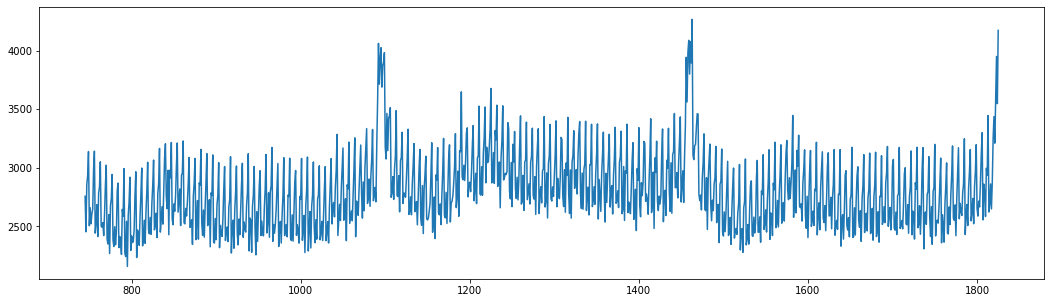

In [41]:
forecast4['yhat731'].plot(figsize=(18,5));

In [42]:
forecast4['yhat731'].iloc[1450:1480]

1450    2707.524414
1451     2852.56543
1452    2973.212402
1453    2703.559326
1454    3090.018555
1455    3351.731934
1456    3942.000977
1457    3561.052734
1458    3981.532227
1459    4087.318359
1460    3798.711426
1461    4075.001465
1462    3893.874512
1463    4265.788574
1464    3105.502197
1465    3069.267578
1466    3189.428711
1467    3198.346436
1468    3341.145508
1469    3460.501709
1470    3458.037109
1471    2773.947266
1472    2719.792725
1473    2766.462646
1474    2640.224609
1475    2913.427246
1476     3040.69873
1477    3289.009033
1478    2646.087891
1479    2632.986572
Name: yhat731, dtype: object

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)



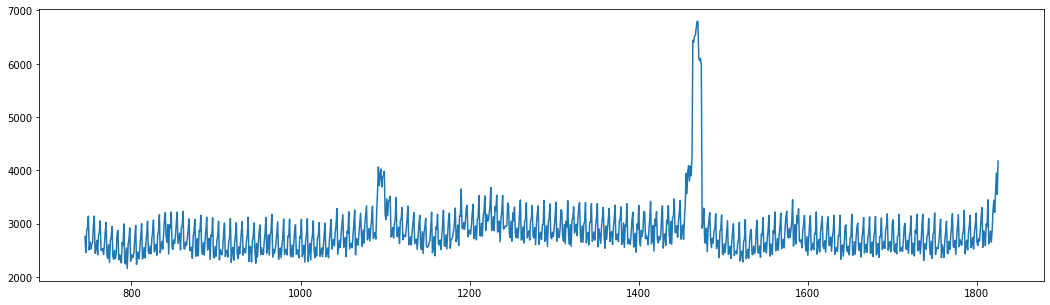

In [43]:
fixed_forecast4 = forecast4.copy()
fixed_forecast4['yhat731'].iloc[1464:1475] = fixed_forecast4['yhat731'].iloc[1464:1475] + fixed_forecast4['yhat731'].iloc[1464-366:1475-366].mean()
fixed_forecast4['yhat731'].plot(figsize=(18,5));

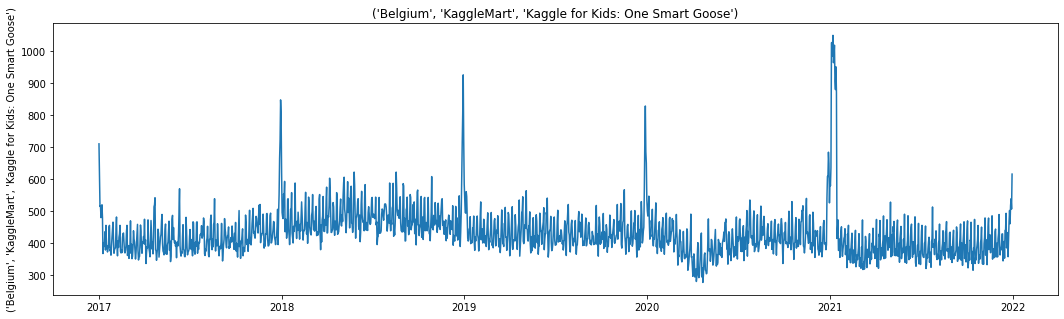

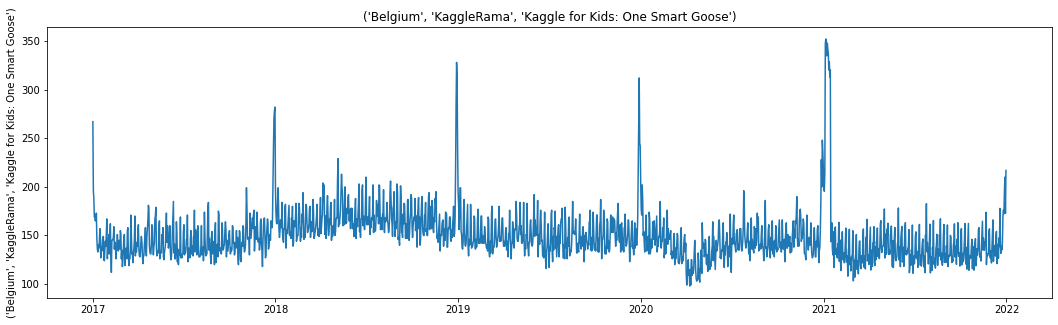

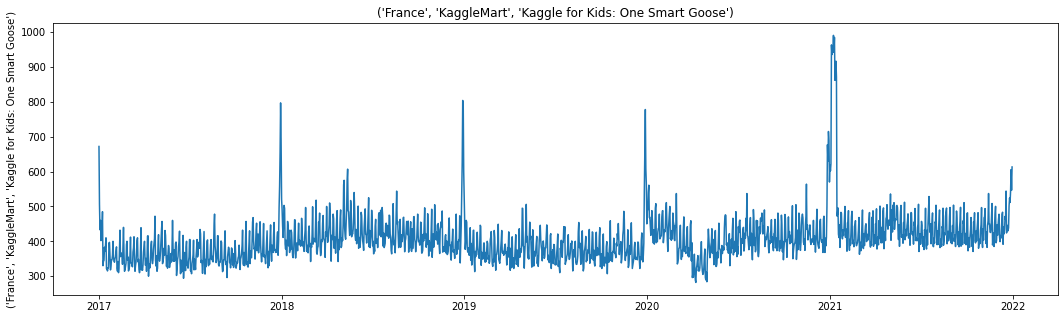

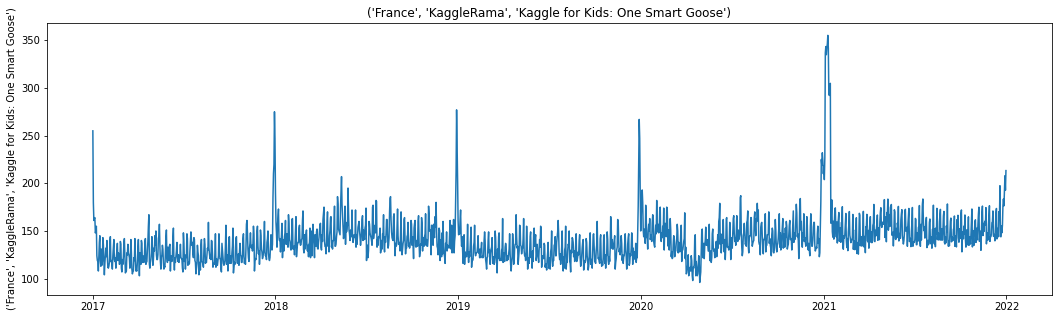

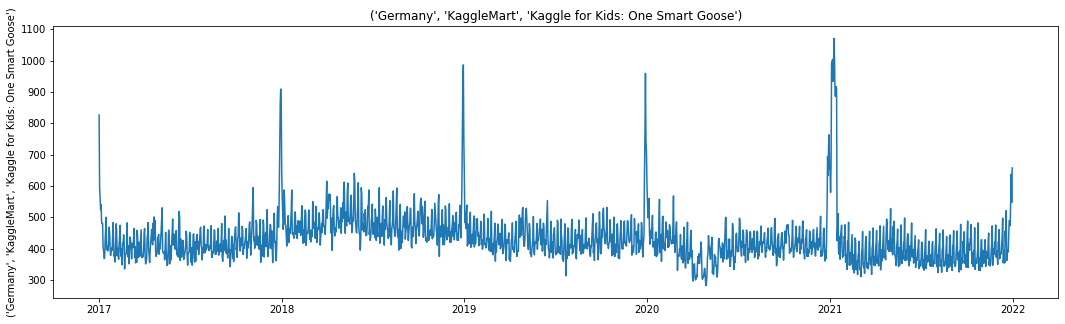

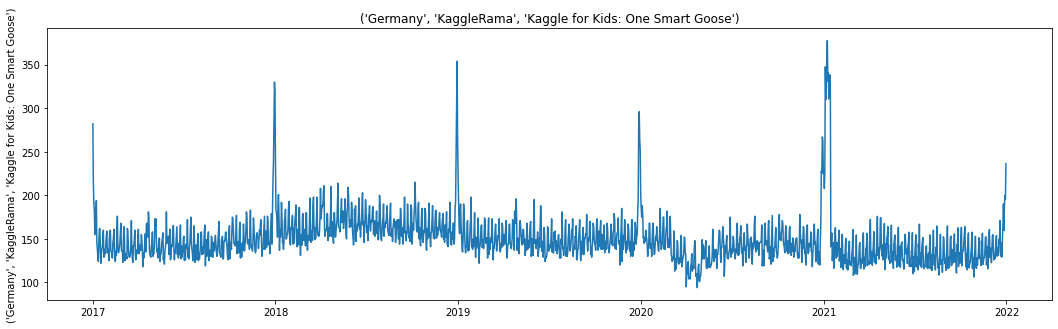

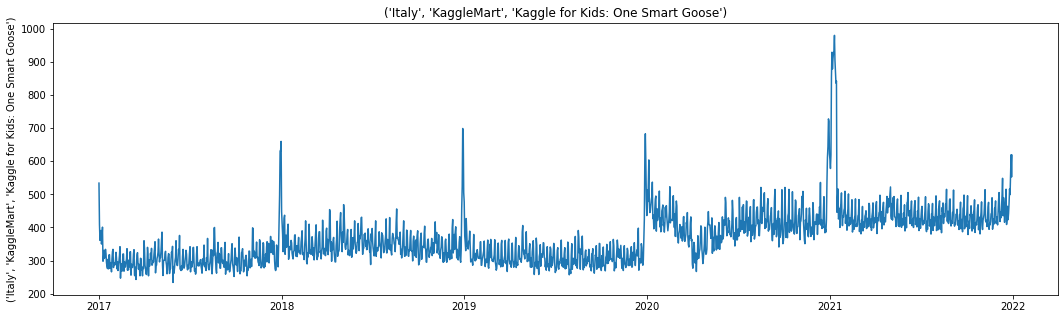

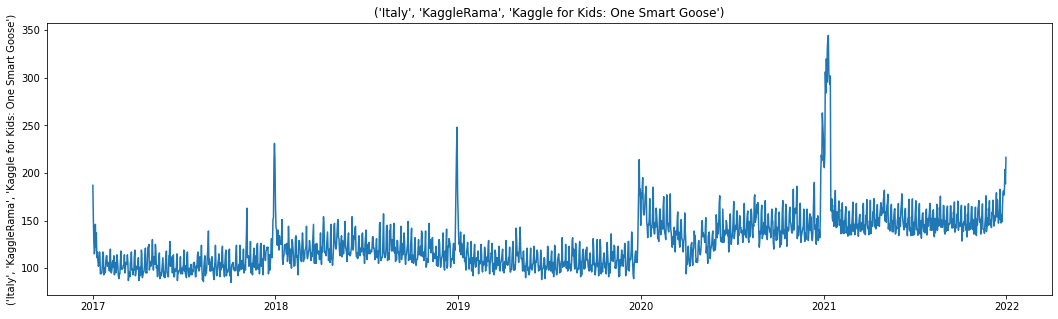

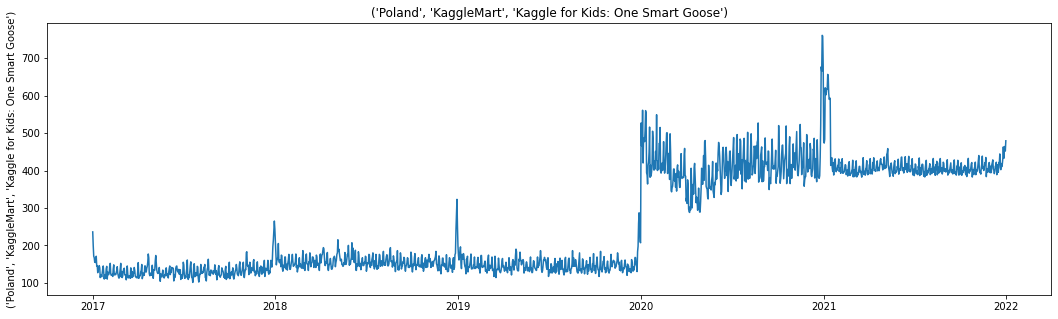

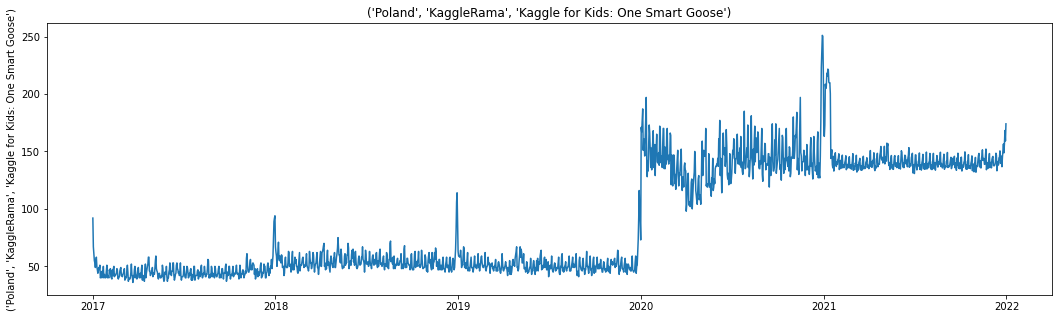

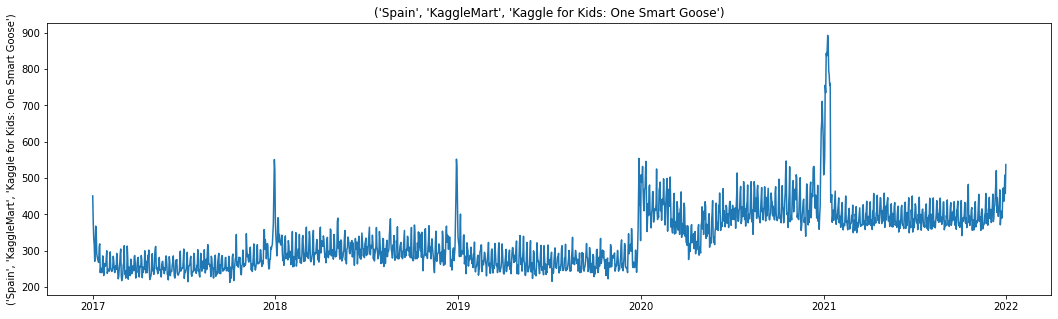

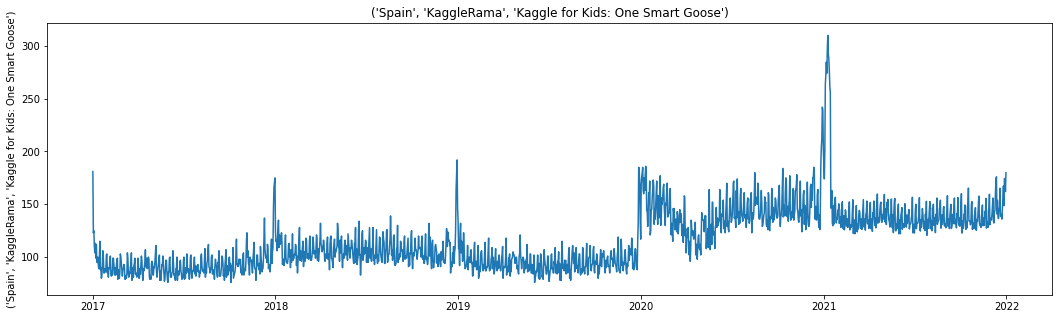

In [44]:
real_kfk = train_dataset[train_dataset['product'] == 'Kaggle for Kids: One Smart Goose'].iloc[:,1:].pivot(index = 'date', columns = ['country', 'store', 'product'], values = 'num_sold')
full_kfk = pd.concat([real_kfk, desagregar_pronostico('Kaggle for Kids: One Smart Goose', fixed_forecast4)], axis = 0)

full_kfk['Belgium', 'KaggleMart', 'Kaggle for Kids: One Smart Goose'].iloc[1461:] = full_kfk['Belgium', 'KaggleMart', 'Kaggle for Kids: One Smart Goose'].iloc[1461:] - full_kfk['Belgium', 'KaggleMart', 'Kaggle for Kids: One Smart Goose'].iloc[1461:].mean()
full_kfk['Belgium', 'KaggleRama', 'Kaggle for Kids: One Smart Goose'].iloc[1461:] = full_kfk['Belgium', 'KaggleRama', 'Kaggle for Kids: One Smart Goose'].iloc[1461:] - full_kfk['Belgium', 'KaggleRama', 'Kaggle for Kids: One Smart Goose'].iloc[1461:].mean()
full_kfk['Germany', 'KaggleMart', 'Kaggle for Kids: One Smart Goose'].iloc[1461:] = full_kfk['Germany', 'KaggleMart', 'Kaggle for Kids: One Smart Goose'].iloc[1461:] - full_kfk['Germany', 'KaggleMart', 'Kaggle for Kids: One Smart Goose'].iloc[1461:].mean()
full_kfk['Germany', 'KaggleRama', 'Kaggle for Kids: One Smart Goose'].iloc[1461:] = full_kfk['Germany', 'KaggleRama', 'Kaggle for Kids: One Smart Goose'].iloc[1461:] - full_kfk['Germany', 'KaggleRama', 'Kaggle for Kids: One Smart Goose'].iloc[1461:].mean()
full_kfk['France', 'KaggleMart', 'Kaggle for Kids: One Smart Goose'].iloc[1461:] = full_kfk['France', 'KaggleMart', 'Kaggle for Kids: One Smart Goose'].iloc[1461:] - full_kfk['France', 'KaggleMart', 'Kaggle for Kids: One Smart Goose'].iloc[1461:].mean()
full_kfk['France', 'KaggleRama', 'Kaggle for Kids: One Smart Goose'].iloc[1461:] = full_kfk['France', 'KaggleRama', 'Kaggle for Kids: One Smart Goose'].iloc[1461:] - full_kfk['France', 'KaggleRama', 'Kaggle for Kids: One Smart Goose'].iloc[1461:].mean()
full_kfk['Italy', 'KaggleMart', 'Kaggle for Kids: One Smart Goose'].iloc[1461:] = full_kfk['Italy', 'KaggleMart', 'Kaggle for Kids: One Smart Goose'].iloc[1461:] - full_kfk['Italy', 'KaggleMart', 'Kaggle for Kids: One Smart Goose'].iloc[1461:].mean()
full_kfk['Italy', 'KaggleRama', 'Kaggle for Kids: One Smart Goose'].iloc[1461:] = full_kfk['Italy', 'KaggleRama', 'Kaggle for Kids: One Smart Goose'].iloc[1461:] - full_kfk['Italy', 'KaggleRama', 'Kaggle for Kids: One Smart Goose'].iloc[1461:].mean()
full_kfk['Poland', 'KaggleMart', 'Kaggle for Kids: One Smart Goose'].iloc[1461:] = full_kfk['Poland', 'KaggleMart', 'Kaggle for Kids: One Smart Goose'].iloc[1461:] - full_kfk['Poland', 'KaggleMart', 'Kaggle for Kids: One Smart Goose'].iloc[1461:].mean()
full_kfk['Poland', 'KaggleRama', 'Kaggle for Kids: One Smart Goose'].iloc[1461:] = full_kfk['Poland', 'KaggleRama', 'Kaggle for Kids: One Smart Goose'].iloc[1461:] - full_kfk['Poland', 'KaggleRama', 'Kaggle for Kids: One Smart Goose'].iloc[1461:].mean()
full_kfk['Spain', 'KaggleMart', 'Kaggle for Kids: One Smart Goose'].iloc[1461:] = full_kfk['Spain', 'KaggleMart', 'Kaggle for Kids: One Smart Goose'].iloc[1461:] - full_kfk['Spain', 'KaggleMart', 'Kaggle for Kids: One Smart Goose'].iloc[1461:].mean()
full_kfk['Spain', 'KaggleRama', 'Kaggle for Kids: One Smart Goose'].iloc[1461:] = full_kfk['Spain', 'KaggleRama', 'Kaggle for Kids: One Smart Goose'].iloc[1461:] - full_kfk['Spain', 'KaggleRama', 'Kaggle for Kids: One Smart Goose'].iloc[1461:].mean()

full_kfk['Belgium', 'KaggleMart', 'Kaggle for Kids: One Smart Goose'].iloc[1461:] = full_kfk['Belgium', 'KaggleMart', 'Kaggle for Kids: One Smart Goose'].iloc[1461:] + full_kfk['Belgium', 'KaggleMart', 'Kaggle for Kids: One Smart Goose'].iloc[1095:1461].mean()
full_kfk['Belgium', 'KaggleRama', 'Kaggle for Kids: One Smart Goose'].iloc[1461:] = full_kfk['Belgium', 'KaggleRama', 'Kaggle for Kids: One Smart Goose'].iloc[1461:] + full_kfk['Belgium', 'KaggleRama', 'Kaggle for Kids: One Smart Goose'].iloc[1095:1461].mean()
full_kfk['Germany', 'KaggleMart', 'Kaggle for Kids: One Smart Goose'].iloc[1461:] = full_kfk['Germany', 'KaggleMart', 'Kaggle for Kids: One Smart Goose'].iloc[1461:] + full_kfk['Germany', 'KaggleMart', 'Kaggle for Kids: One Smart Goose'].iloc[1095:1461].mean()
full_kfk['Germany', 'KaggleRama', 'Kaggle for Kids: One Smart Goose'].iloc[1461:] = full_kfk['Germany', 'KaggleRama', 'Kaggle for Kids: One Smart Goose'].iloc[1461:] + full_kfk['Germany', 'KaggleRama', 'Kaggle for Kids: One Smart Goose'].iloc[1095:1461].mean()
full_kfk['France', 'KaggleMart', 'Kaggle for Kids: One Smart Goose'].iloc[1461:] = full_kfk['France', 'KaggleMart', 'Kaggle for Kids: One Smart Goose'].iloc[1461:] + full_kfk['France', 'KaggleMart', 'Kaggle for Kids: One Smart Goose'].iloc[1095:1461].mean()* 1.1
full_kfk['France', 'KaggleRama', 'Kaggle for Kids: One Smart Goose'].iloc[1461:] = full_kfk['France', 'KaggleRama', 'Kaggle for Kids: One Smart Goose'].iloc[1461:] + full_kfk['France', 'KaggleRama', 'Kaggle for Kids: One Smart Goose'].iloc[1095:1461].mean()* 1.1
full_kfk['Italy', 'KaggleMart', 'Kaggle for Kids: One Smart Goose'].iloc[1461:] = full_kfk['Italy', 'KaggleMart', 'Kaggle for Kids: One Smart Goose'].iloc[1461:] + full_kfk['Italy', 'KaggleMart', 'Kaggle for Kids: One Smart Goose'].iloc[1095:1461].mean()* 1.1
full_kfk['Italy', 'KaggleRama', 'Kaggle for Kids: One Smart Goose'].iloc[1461:] = full_kfk['Italy', 'KaggleRama', 'Kaggle for Kids: One Smart Goose'].iloc[1461:] + full_kfk['Italy', 'KaggleRama', 'Kaggle for Kids: One Smart Goose'].iloc[1095:1461].mean()* 1.1
full_kfk['Poland', 'KaggleMart', 'Kaggle for Kids: One Smart Goose'].iloc[1461:] = full_kfk['Poland', 'KaggleMart', 'Kaggle for Kids: One Smart Goose'].iloc[1461:] + full_kfk['Poland', 'KaggleMart', 'Kaggle for Kids: One Smart Goose'].iloc[1095:1461].mean()
full_kfk['Poland', 'KaggleRama', 'Kaggle for Kids: One Smart Goose'].iloc[1461:] = full_kfk['Poland', 'KaggleRama', 'Kaggle for Kids: One Smart Goose'].iloc[1461:] + full_kfk['Poland', 'KaggleRama', 'Kaggle for Kids: One Smart Goose'].iloc[1095:1461].mean()
full_kfk['Spain', 'KaggleMart', 'Kaggle for Kids: One Smart Goose'].iloc[1461:] = full_kfk['Spain', 'KaggleMart', 'Kaggle for Kids: One Smart Goose'].iloc[1461:] + full_kfk['Spain', 'KaggleMart', 'Kaggle for Kids: One Smart Goose'].iloc[1095:1461].mean()
full_kfk['Spain', 'KaggleRama', 'Kaggle for Kids: One Smart Goose'].iloc[1461:] = full_kfk['Spain', 'KaggleRama', 'Kaggle for Kids: One Smart Goose'].iloc[1461:] + full_kfk['Spain', 'KaggleRama', 'Kaggle for Kids: One Smart Goose'].iloc[1095:1461].mean()

for column in full_kfk.columns:
    plt.subplots(figsize=(18,5))
    sns.lineplot(data=full_kfk, x=full_kfk.index, y=column).set_title(column);

In [45]:
full_kfk

country                             Belgium                                   \
store                            KaggleMart                       KaggleRama   
product    Kaggle for Kids: One Smart Goose Kaggle for Kids: One Smart Goose   
2017-01-01                              710                              267   
2017-01-02                              601                              196   
2017-01-03                              515                              188   
2017-01-04                              517                              169   
2017-01-05                              480                              169   
...                                     ...                              ...   
2021-12-27                       460.960594                       172.352407   
2021-12-28                       516.922459                        196.09448   
2021-12-29                       538.846232                       210.054417   
2021-12-30                        506.74481                       172.686646   
2021-12-31                       615.725129                       216.875087   

country                              France                                   \
store                            KaggleMart                       KaggleRama   
product    Kaggle for Kids: One Smart Goose Kaggle for Kids: One Smart Goose   
2017-01-01                              672                              255   
2017-01-02                              506                              180   
2017-01-03                              433                              161   
2017-01-04                              460                              163   
2017-01-05                              402                              164   
...                                     ...                              ...   
2021-12-27                       511.496177                       176.339414   
2021-12-28                       542.981974                       192.283539   
2021-12-29                        605.51955                       207.898185   
2021-12-30                       546.446022                       192.700579   
2021-12-31                        613.25689                       213.301776   

country                             Germany                                   \
store                            KaggleMart                       KaggleRama   
product    Kaggle for Kids: One Smart Goose Kaggle for Kids: One Smart Goose   
2017-01-01                              826                              282   
2017-01-02                              594                              214   
2017-01-03                              558                              191   
2017-01-04                              524                              182   
2017-01-05                              540                              155   
...                                     ...                              ...   
2021-12-27                       472.785109                        159.72445   
2021-12-28                       555.051741                       188.302223   
2021-12-29                       637.229417                       199.784024   
2021-12-30                       547.148697                       195.678898   
2021-12-31                       657.176701                       236.329589   

country                               Italy                                   \
store                            KaggleMart                       KaggleRama   
product    Kaggle for Kids: One Smart Goose Kaggle for Kids: One Smart Goose   
2017-01-01                              534                              187   
2017-01-02                              409                              152   
2017-01-03                              361                              127   
2017-01-04                              367                              115   
2017-01-05                              391                              119 

### Merging results to test dataset:

In [46]:
test = pd.read_csv('../input/tabular-playground-series-sep-2022/test.csv')
test

row_id        date  country       store  \
0       70128  2021-01-01  Belgium  KaggleMart   
1       70129  2021-01-01  Belgium  KaggleMart   
2       70130  2021-01-01  Belgium  KaggleMart   
3       70131  2021-01-01  Belgium  KaggleMart   
4       70132  2021-01-01  Belgium  KaggleRama   
...       ...         ...      ...         ...   
17515   87643  2021-12-31    Spain  KaggleMart   
17516   87644  2021-12-31    Spain  KaggleRama   
17517   87645  2021-12-31    Spain  KaggleRama   
17518   87646  2021-12-31    Spain  KaggleRama   
17519   87647  2021-12-31    Spain  KaggleRama   

                                product  
0            Kaggle Advanced Techniques  
1                Kaggle Getting Started  
2                    Kaggle Recipe Book  
3      Kaggle for Kids: One Smart Goose  
4            Kaggle Advanced Techniques  
...                                 ...  
17515  Kaggle for Kids: One Smart Goose  
17516        Kaggle Advanced Techniques  
17517            Kaggle Getting Started  
17518                Kaggle Recipe Book  
17519  Kaggle for Kids: One Smart Goose  

[17520 rows x 5 columns]

In [47]:
index_2021 = pd.date_range(start='2021/1/1', periods=365, freq='D').to_list() * 12
len(index_2021)

4380

In [48]:
def melt_dataframe(df):
    temp_df = df.iloc[-365:,:].melt()
    temp_df['date'] = index_2021
    temp_df = temp_df[['date', 'country', 'store', 'product', 'value']]
    temp_df['date'] = temp_df['date'].astype(str)
    return temp_df

In [49]:
full_forecasting = pd.concat([melt_dataframe(full_kag), melt_dataframe(full_kgs), melt_dataframe(full_krb), melt_dataframe(full_kfk)], axis=0)
full_forecasting

date  country       store                           product  \
0     2021-01-01  Belgium  KaggleMart        Kaggle Advanced Techniques   
1     2021-01-02  Belgium  KaggleMart        Kaggle Advanced Techniques   
2     2021-01-03  Belgium  KaggleMart        Kaggle Advanced Techniques   
3     2021-01-04  Belgium  KaggleMart        Kaggle Advanced Techniques   
4     2021-01-05  Belgium  KaggleMart        Kaggle Advanced Techniques   
...          ...      ...         ...                               ...   
4375  2021-12-27    Spain  KaggleRama  Kaggle for Kids: One Smart Goose   
4376  2021-12-28    Spain  KaggleRama  Kaggle for Kids: One Smart Goose   
4377  2021-12-29    Spain  KaggleRama  Kaggle for Kids: One Smart Goose   
4378  2021-12-30    Spain  KaggleRama  Kaggle for Kids: One Smart Goose   
4379  2021-12-31    Spain  KaggleRama  Kaggle for Kids: One Smart Goose   

           value  
0     739.830672  
1     913.321709  
2     932.320987  
3      884.72182  
4     851.913761  
...          ...  
4375   148.67016  
4376  174.366285  
4377  172.656142  
4378   162.01416  
4379  179.939411  

[17520 rows x 5 columns]

In [50]:
submission_df = pd.merge(full_forecasting, test, how='right', on = ['date', 'country', 'store', 'product'])
submission_df

date  country       store                           product  \
0      2021-01-01  Belgium  KaggleMart        Kaggle Advanced Techniques   
1      2021-01-01  Belgium  KaggleMart            Kaggle Getting Started   
2      2021-01-01  Belgium  KaggleMart                Kaggle Recipe Book   
3      2021-01-01  Belgium  KaggleMart  Kaggle for Kids: One Smart Goose   
4      2021-01-01  Belgium  KaggleRama        Kaggle Advanced Techniques   
...           ...      ...         ...                               ...   
17515  2021-12-31    Spain  KaggleMart  Kaggle for Kids: One Smart Goose   
17516  2021-12-31    Spain  KaggleRama        Kaggle Advanced Techniques   
17517  2021-12-31    Spain  KaggleRama            Kaggle Getting Started   
17518  2021-12-31    Spain  KaggleRama                Kaggle Recipe Book   
17519  2021-12-31    Spain  KaggleRama  Kaggle for Kids: One Smart Goose   

             value  row_id  
0       739.830672   70128  
1      1012.077226   70129  
2       407.102834   70130  
3       592.098302   70131  
4       271.845041   70132  
...            ...     ...  
17515    537.27645   87643  
17516   159.500535   87644  
17517   149.161427   87645  
17518   114.413105   87646  
17519   179.939411   87647  

[17520 rows x 6 columns]

In [51]:
submission_df.isnull().sum()

date       0
country    0
store      0
product    0
value      0
row_id     0
dtype: int64

In [52]:
submission = submission_df[['row_id', 'value']]
submission.columns = ['row_id', 'num_sold']
submission

row_id     num_sold
0       70128   739.830672
1       70129  1012.077226
2       70130   407.102834
3       70131   592.098302
4       70132   271.845041
...       ...          ...
17515   87643    537.27645
17516   87644   159.500535
17517   87645   149.161427
17518   87646   114.413105
17519   87647   179.939411

[17520 rows x 2 columns]

In [53]:
submission.to_csv('submission.csv', index = False)